# Couple candlestick for Short signal- Analytics

In [18]:
# the last one of 2 candlesticks is shaven head

### Import Library

In [19]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [20]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [21]:
data = dataset.copy()

In [22]:
# data = data[data.index < '2024-10-01 00:00:00']
# data = data[(data.index > '2020-11-01 00:00:00') & (data.index < '2024-10-01 00:00:00')]
data = data[data.index > '2020-11-01 00:00:00']

In [23]:
def set_condition_1(r):
    cond = ''
    if r['Open'] > r['Close'] >= r['Low'] + 0.1:
        # Do va co bong nen duoi
        cond = 'short'
    return cond


def set_condition_2(r):
    cond = ''
    if r['Open'] > r['Close'] == r['Low'] and r['Low'] < r['low_s1']:
        # Do va khong co bong nen duoi
        cond = 'short'
    return cond
    

def get_couple_candleticks_signal(r):
    signal = ''
    if 100 * r.name.hour + r.name.minute >= 1425:
        return signal
    if r['condition_1'] == 'short' and r['condition_2'] == 'short':
        signal = 'short'
    return signal

In [24]:
# Couple candlesticks signal
data['low_s1'] = data['Low'].shift(1)
data['high_s1'] = data['High'].shift(1)
data['max_5'] = data['High'].rolling(5).max()
data['min_5'] = data['Low'].rolling(5).min()
data['condition_1'] = data.apply(lambda r: set_condition_1(r), axis=1)
data['condition_1'] = data['condition_1'].shift(1)
data['condition_2'] = data.apply(lambda r: set_condition_2(r), axis=1)
data['signal'] = data.apply(lambda r: get_couple_candleticks_signal(r), axis=1)

In [25]:
data[data['signal'] != '']

,Open,High,Low,Close,Volume,low_s1,high_s1,max_5,min_5,condition_1,condition_2,signal
Date,,,,,,,,,,,,
2020-11-02 10:05:00,900.0,900.4,899.5,899.5,1044,900.0,901.3,901.4,897.7,short,short,short
2020-11-03 09:20:00,908.5,908.8,908.1,908.1,847,908.3,908.9,909.4,908.1,short,short,short
2020-11-04 09:35:00,907.8,908.0,907.3,907.3,1361,907.5,908.4,908.8,907.3,short,short,short
2020-11-11 09:15:00,921.9,922.0,921.1,921.1,2163,921.8,922.3,922.6,921.0,short,short,short
2020-11-11 11:20:00,920.9,920.9,919.2,919.2,3370,920.5,922.2,922.8,919.2,short,short,short
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-05 13:25:00,1331.7,1332.1,1330.9,1330.9,1833,1331.3,1332.2,1332.6,1330.9,short,short,short
2025-02-10 14:20:00,1333.5,1334.3,1332.2,1332.2,4219,1333.0,1334.7,1336.2,1332.2,short,short,short
2025-02-12 09:20:00,1340.4,1340.5,1339.3,1339.3,2902,1339.9,1341.4,1341.4,1337.4,short,short,short


## Trap labeling

In [26]:
traps = []
for i, row in data.iterrows():
    if row['signal']:
        current_date = row.name.strftime('%Y-%m-%d ').format()
        current_time = row.name
        data_to_end_day = data[(data.index > current_time) & (data.index < current_date + ' 14:30:00')]
        #
        if row['signal'] == 'short':
            if len(data_to_end_day[data_to_end_day.Low < row['Close'] - 3.5]) > 0:
                traps.append(1)
            else:
                traps.append(0)
    else:
        traps.append(0)

In [27]:
data['trap'] = traps

In [28]:
data[data.trap != 0]

,Open,High,Low,Close,Volume,low_s1,high_s1,max_5,min_5,condition_1,condition_2,signal,trap
Date,,,,,,,,,,,,,
2020-11-02 10:05:00,900.0,900.4,899.5,899.5,1044,900.0,901.3,901.4,897.7,short,short,short,1
2020-11-03 09:20:00,908.5,908.8,908.1,908.1,847,908.3,908.9,909.4,908.1,short,short,short,1
2020-11-11 09:15:00,921.9,922.0,921.1,921.1,2163,921.8,922.3,922.6,921.0,short,short,short,1
2020-11-11 11:20:00,920.9,920.9,919.2,919.2,3370,920.5,922.2,922.8,919.2,short,short,short,1
2020-11-18 11:25:00,937.9,938.0,936.1,936.1,2372,937.6,938.5,938.7,935.0,short,short,short,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-16 10:40:00,1306.1,1306.3,1304.5,1304.5,2973,1305.7,1306.4,1306.9,1304.5,short,short,short,1
2025-01-21 09:40:00,1330.8,1331.4,1329.8,1329.8,3470,1330.4,1331.5,1333.2,1329.8,short,short,short,1
2025-01-21 10:25:00,1328.8,1328.8,1327.0,1327.0,7259,1328.6,1329.8,1329.9,1327.0,short,short,short,1


In [29]:
real_signal_rate = len(data[(data.signal != '') & (data.trap == 0)]) / len(data[data.signal != ''])
real_signal_rate

0.36813681368136814

## Analytics

In [30]:
data['RSI'] = ta.rsi(data["Close"], length=14)
data['RSI'] = round(data['RSI'])
data["ATR"] = ta.atr(data['High'], data['Low'], data['Close'], length=14)
adx42 = ta.adx(data['High'], data['Low'], data['Close'], length=42)
adx5 = ta.adx(data['High'], data['Low'], data['Close'], length=5)
data = data.assign(ADX42=adx42['ADX_42'])
data = data.assign(ADX5=adx5['ADX_5'])
macd = ta.macd(data['Close'], 26, 12, 9)
data = data.assign(MACDh=macd['MACDh_12_26_9']).rename(columns={'MACDh_12_26_9': 'MACDh'})    # Histogram

## 18. Sum body and height last 5 candlesticks

In [31]:
df18 = data[["Open", "Close", "High", "Low", "RSI", "signal", "trap"]].copy()
df18['body'] = df18.apply(lambda r: r['Close'] - r['Open'], axis=1)
df18['sum_body'] = df18['body'].rolling(10).sum()
df18['sum_body'] = round(df18['sum_body'], 1)
df18['height'] = df18.apply(lambda r: r['High'] - r['Low'], axis=1)
df18['sum_height'] = df18['height'].rolling(10).sum()
df18['sum_height'] = round(df18['sum_height'], 1)
signal_data = df18[df18.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

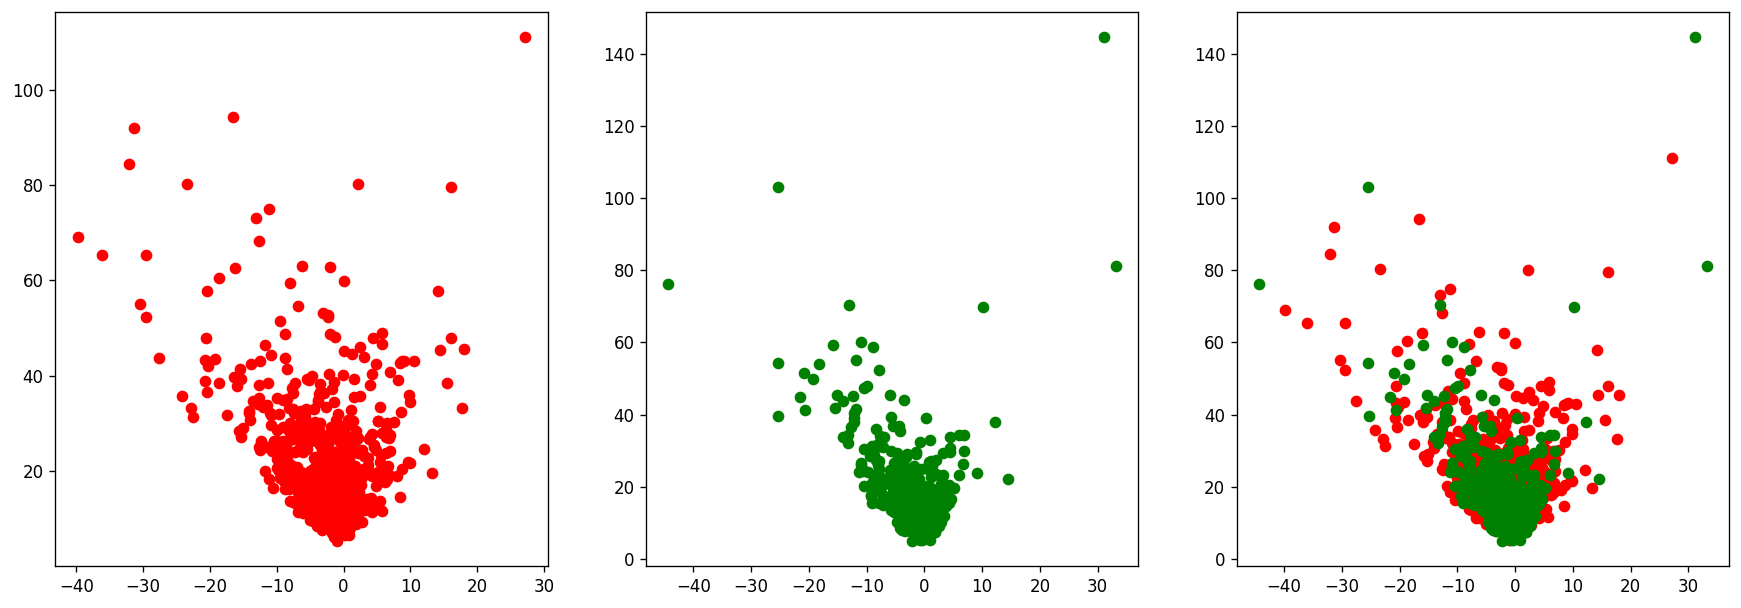

In [32]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['sum_body'], trap_signals['sum_height'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['sum_body'], real_signals['sum_height'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['sum_body'], trap_signals['sum_height'], c='red')
plt.scatter(real_signals['sum_body'], real_signals['sum_height'], c='green')

<Axes: xlabel='custom_rate'>

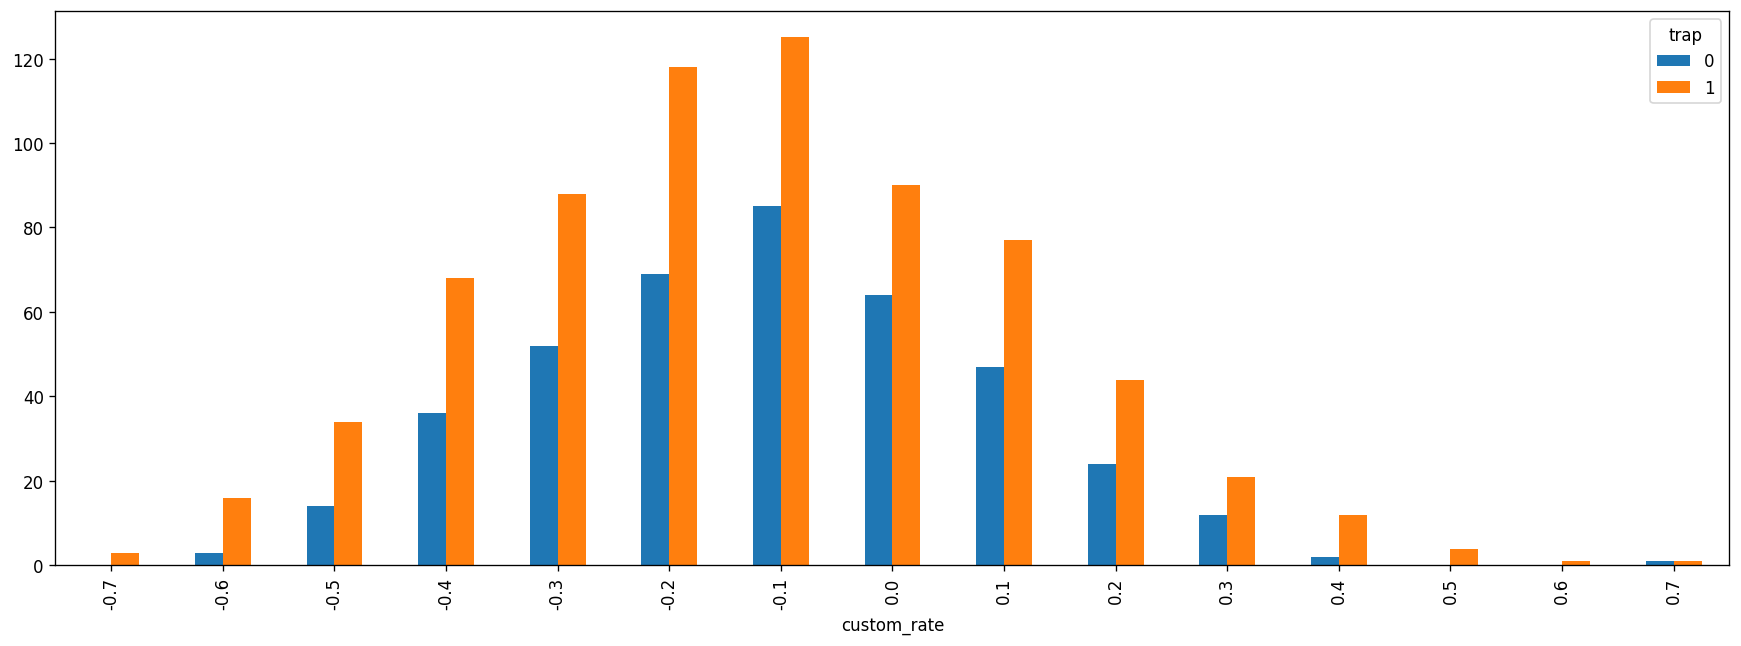

In [33]:
signal_data['custom_rate'] = signal_data['sum_body'] / signal_data['sum_height']
signal_data['custom_rate'] = round(signal_data['custom_rate'], 1)
signal_group_by_custom_rate = signal_data.groupby(['custom_rate', 'trap'])['custom_rate'].count().rename({'custom_rate': 'count'})
signal_group_by_custom_rate.unstack().plot.bar()

## 17. Sum 5 last IBSs

In [34]:
df17 = data[["Open", "Close", "High", "Low", "RSI", "signal", "trap"]].copy()
df17['ibs'] = df17.apply(lambda r: 0 if r['High'] == r['Close'] else (r['Close'] - r['Low']) / (r['High'] - r['Low']), axis=1)
df17['sum_ibs'] = df17['ibs'].rolling(5).sum()
df17['sum_ibs'] = round(df17['sum_ibs'], 1)
signal_data = df17[df17.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

<Axes: xlabel='sum_ibs'>

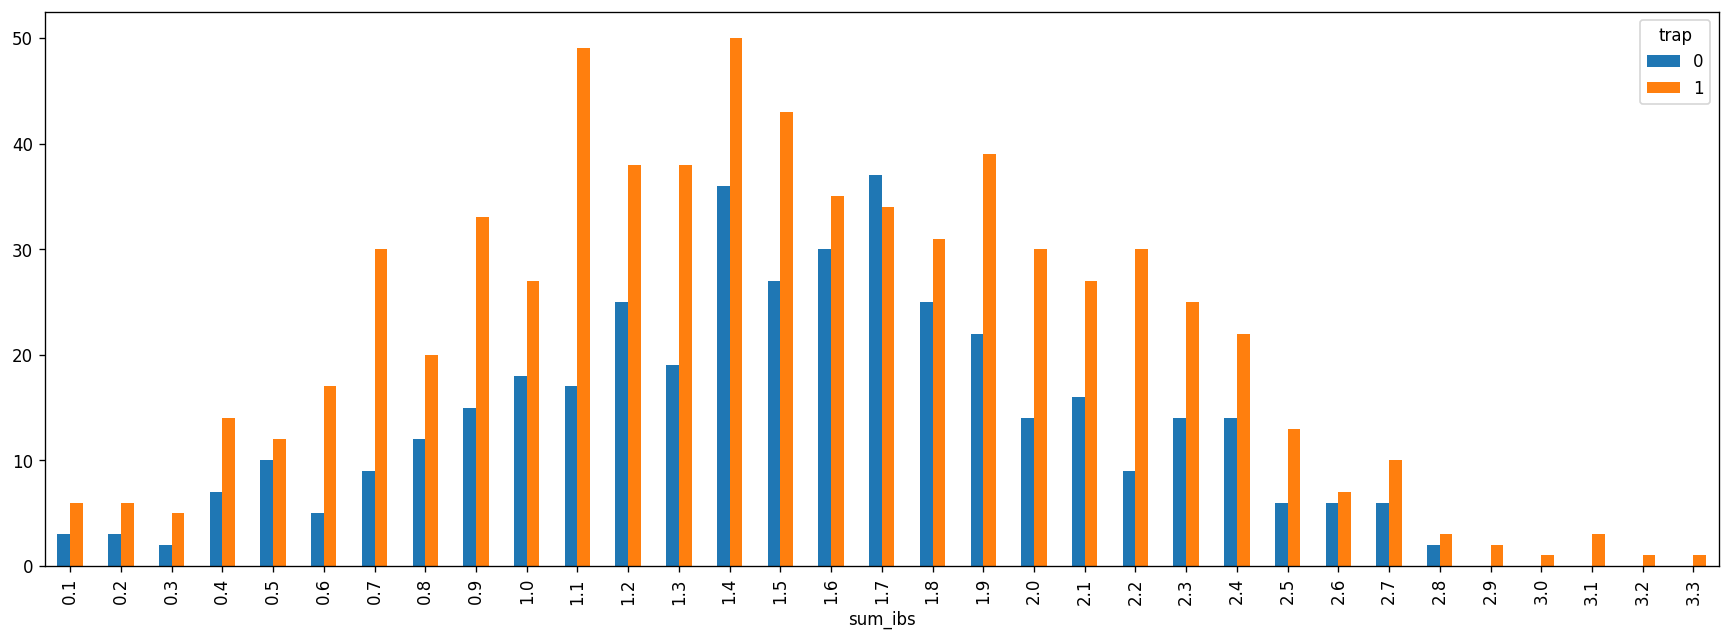

In [35]:
signal_group_by_custom_ibs = signal_data.groupby(['sum_ibs', 'trap'])['sum_ibs'].count().rename({'sum_ibs': 'count'})
signal_group_by_custom_ibs.unstack().plot.bar()

## 16. XXX

In [36]:
df16 = data[["Open", "Close", "High", "Low", "RSI", "signal", "trap"]].copy()
df16['max_10'] = df16['High'].rolling(10).max()
df16['min_10'] = df16['Low'].rolling(10).min()
df16['range_10'] = df16['max_10'] - df16['min_10']
df16['range_10'] = round(df16['range_10'], 1)
df16['bodyc'] = df16['Close'] - df16['Open'].shift(1)
signal_data = df16[df16.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

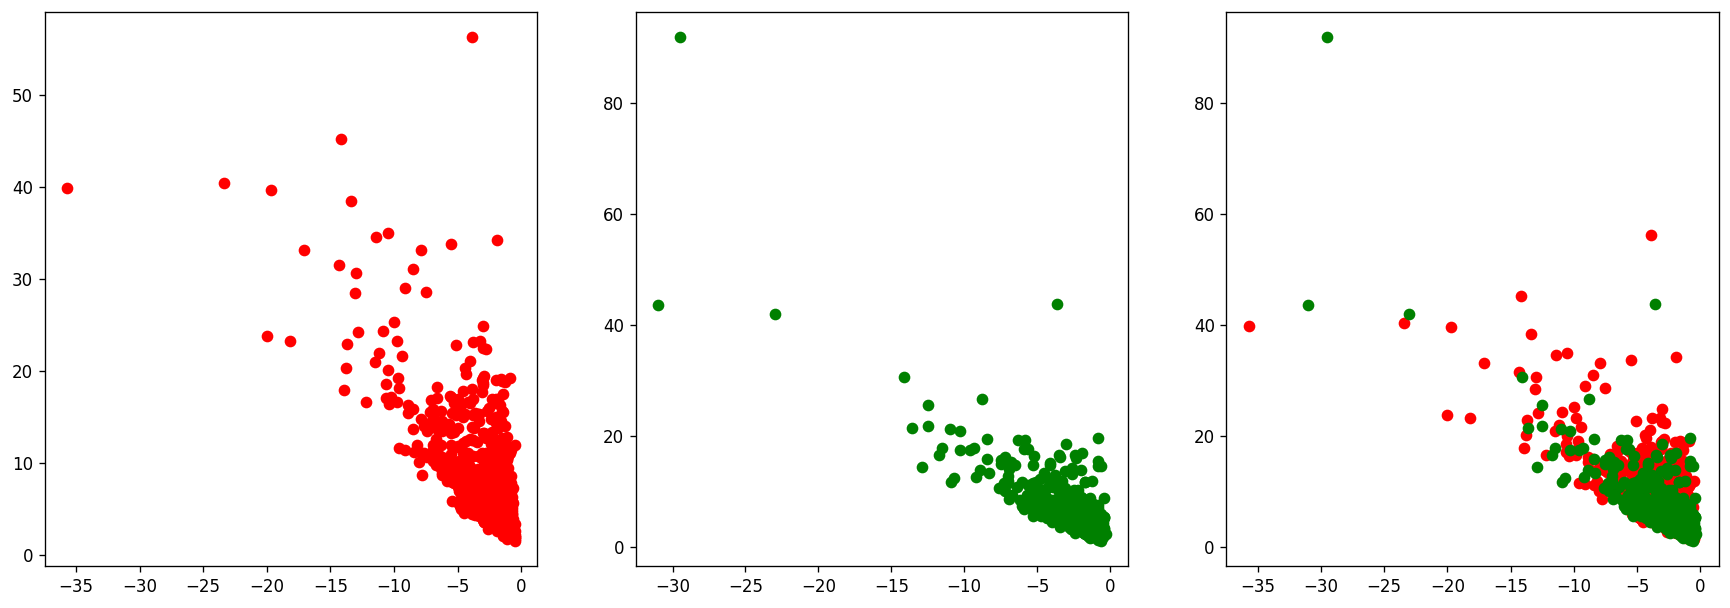

In [37]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['bodyc'], trap_signals['range_10'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['bodyc'], real_signals['range_10'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['bodyc'], trap_signals['range_10'], c='red')
plt.scatter(real_signals['bodyc'], real_signals['range_10'], c='green')

## 15. Volume to last 2 volumes

In [38]:
df15 = data[["Open", "Close", "High", "Low", "signal", "Volume", "trap"]].copy()
df15['diff1'] = df15['Volume'] - df15['Volume'].shift(1)
df15['diff2'] = df15['Volume'] - df15['Volume'].shift(2)
df15['diff1'] = df15['diff1'] / 1000
df15['diff2'] = df15['diff2'] / 1000
#
signal_data = df15[df15.signal != '']
signal_data.dropna(inplace=True)
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

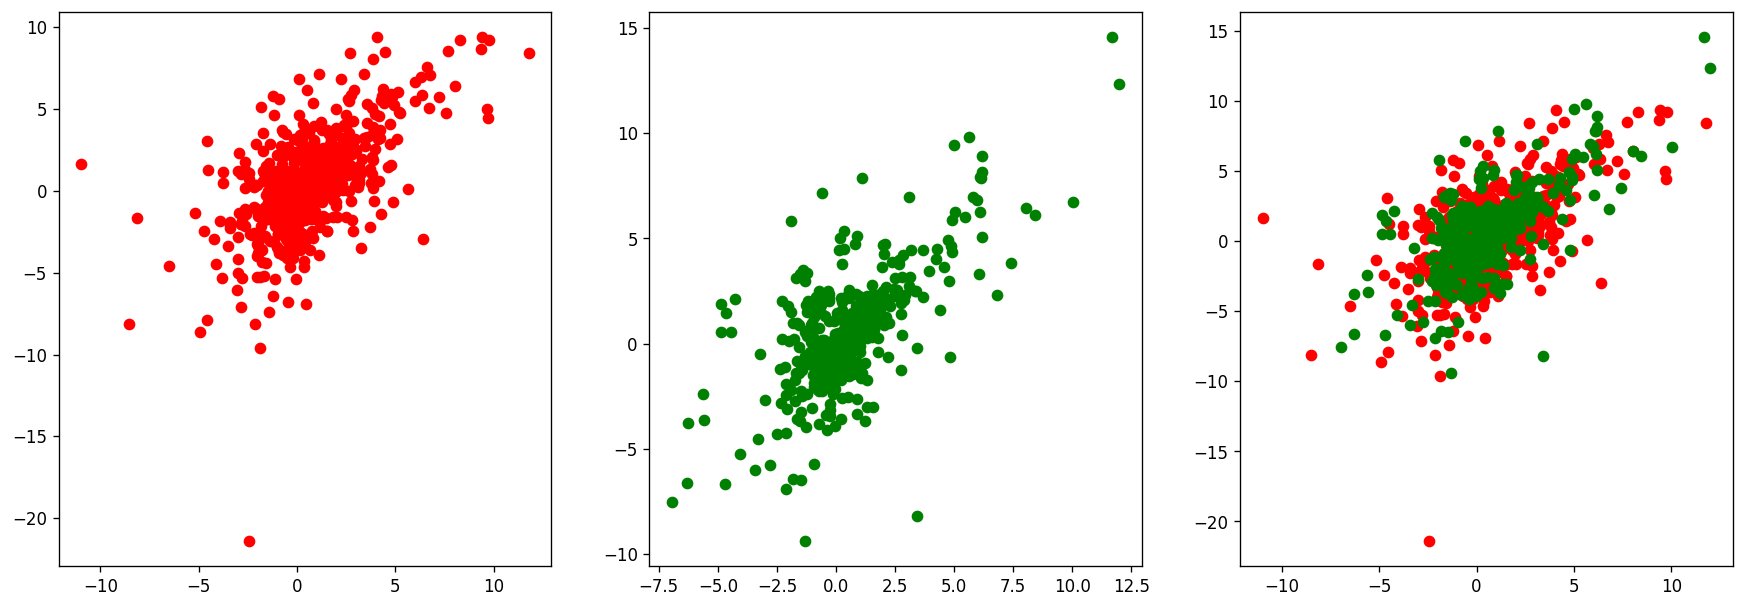

In [39]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['diff1'], trap_signals['diff2'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['diff1'], real_signals['diff2'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['diff1'], trap_signals['diff2'], c='red')
plt.scatter(real_signals['diff1'], real_signals['diff2'], c='green')

## 14. Volume to max-min Volume

In [40]:
df14 = data[["Open", "Close", "High", "Low", "signal", "Volume", "trap"]].copy()
df14['max_Vol'] = df14['Volume'].shift(1).rolling(20).max()
df14['min_Vol'] = df14['Volume'].shift(1).rolling(20).min()
df14['diffMaxVolume'] = (df14['Volume'] - df14['max_Vol']) / 1000
df14['diffMinVolume'] = (df14['Volume'] - df14['min_Vol']) / 1000
#
signal_data = df14[df14.signal != '']
signal_data.dropna(inplace=True)
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

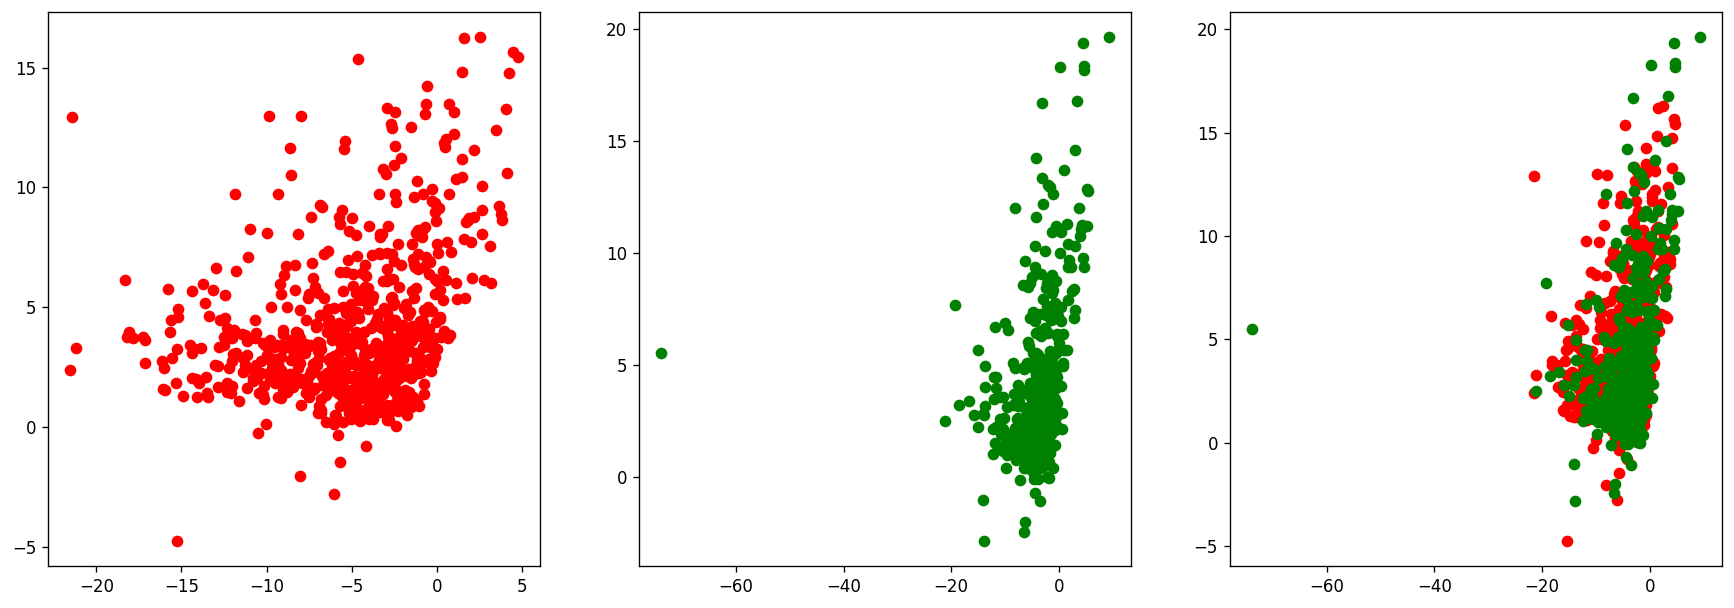

In [41]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['diffMaxVolume'], trap_signals['diffMinVolume'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['diffMaxVolume'], real_signals['diffMinVolume'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['diffMaxVolume'], trap_signals['diffMinVolume'], c='red')
plt.scatter(real_signals['diffMaxVolume'], real_signals['diffMinVolume'], c='green')

## 13. Next candlestick & next Volume

In [42]:
df13 = data[["Open", "Close", "High", "Low", "signal", "Volume", "trap"]].copy()
df13['diffNextClose'] = df13['Close'].shift(-1) - df13['Close']
df13['diffNextClose'] = round(df13['diffNextClose'], 1)
df13['diffNextVolume'] = (df13['Volume'].shift(-1) - df13['Volume']) / df13['Volume']
df13['diffNextVolume']  = round(df13['diffNextVolume'] , 1)
#
signal_data = df13[df13.signal != '']
signal_data.dropna(inplace=True)
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

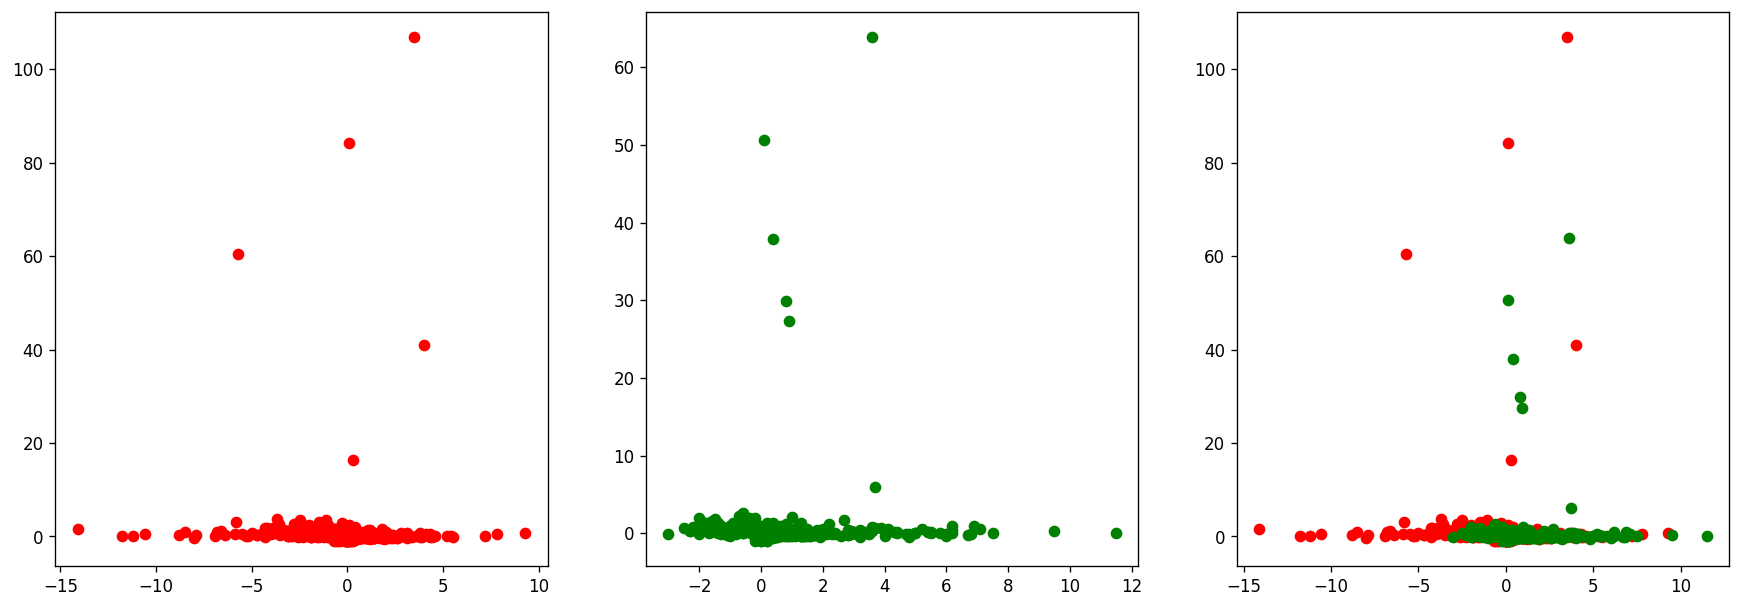

In [43]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['diffNextClose'], trap_signals['diffNextVolume'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['diffNextClose'], real_signals['diffNextVolume'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['diffNextClose'], trap_signals['diffNextVolume'], c='red')
plt.scatter(real_signals['diffNextClose'], real_signals['diffNextVolume'], c='green')

In [44]:
# quantile signal data
deq_low = real_signals["diffNextClose"].quantile(0.01)
deq_high  = real_signals["diffNextClose"].quantile(0.99)
quantile_data = real_signals[(real_signals["diffNextClose"] < deq_high) & (real_signals["diffNextClose"] > deq_low)]
quantile_data['diffNextClose'].min()

-2.0

In [45]:
quantile_data['diffNextClose'].max()

6.8

In [46]:
signal_data['diffNextClose'].min()

-14.1

## 12. Couple price move

In [47]:
df12 = data[["Open", "Close", "High", "Low", "signal", "ATR", "trap"]].copy()
df12['price_move1'] = df12['Close'] - df12['Close'].shift(1)
df12['price_move2'] = df12['Close'].shift(1) - df12['Close'].shift(2)
df12['price_move1'] = round(df12['price_move1'], 1)
df12['price_move2'] = round(df12['price_move2'], 1)
#
signal_data = df12[df12.signal != '']
signal_data.dropna(inplace=True)
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

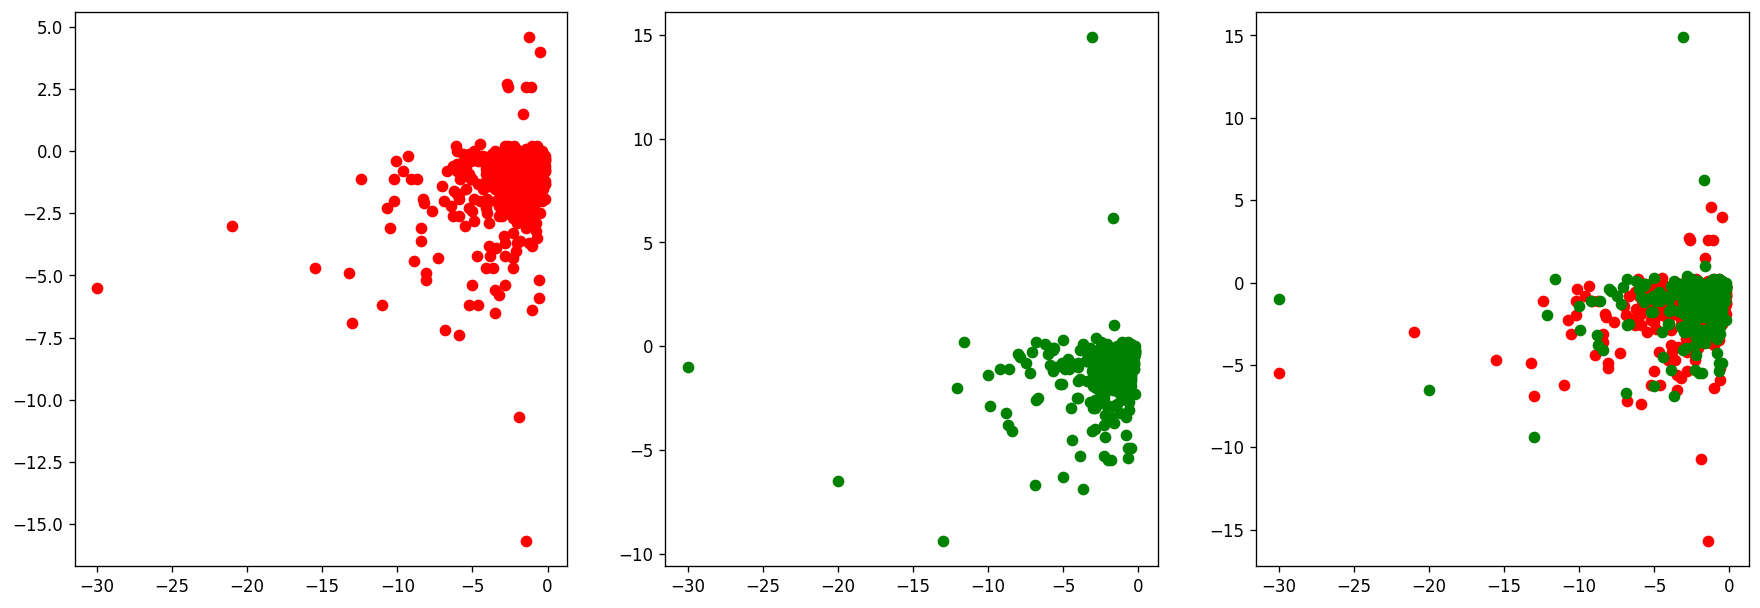

In [48]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['price_move1'], trap_signals['price_move2'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['price_move1'], real_signals['price_move2'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['price_move1'], trap_signals['price_move2'], c='red')
plt.scatter(real_signals['price_move1'], real_signals['price_move2'], c='green')

## 11. Distance from Close to EMA_20 & EMA_20 to EMA_250

In [49]:
df11= data[["Open", "Close", "High", "Low", "signal", "trap"]].copy()
#
df11["ema_f"] = ta.ema(df11["Close"], length=26)
df11["ema_l"] = ta.ema(df11["Close"], length=250)
df11["distance_1"] = df11["Close"] - df11["ema_f"]
df11["distance_2"] = df11["ema_f"] - df11["ema_l"]
#
signal_data = df11[df11.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

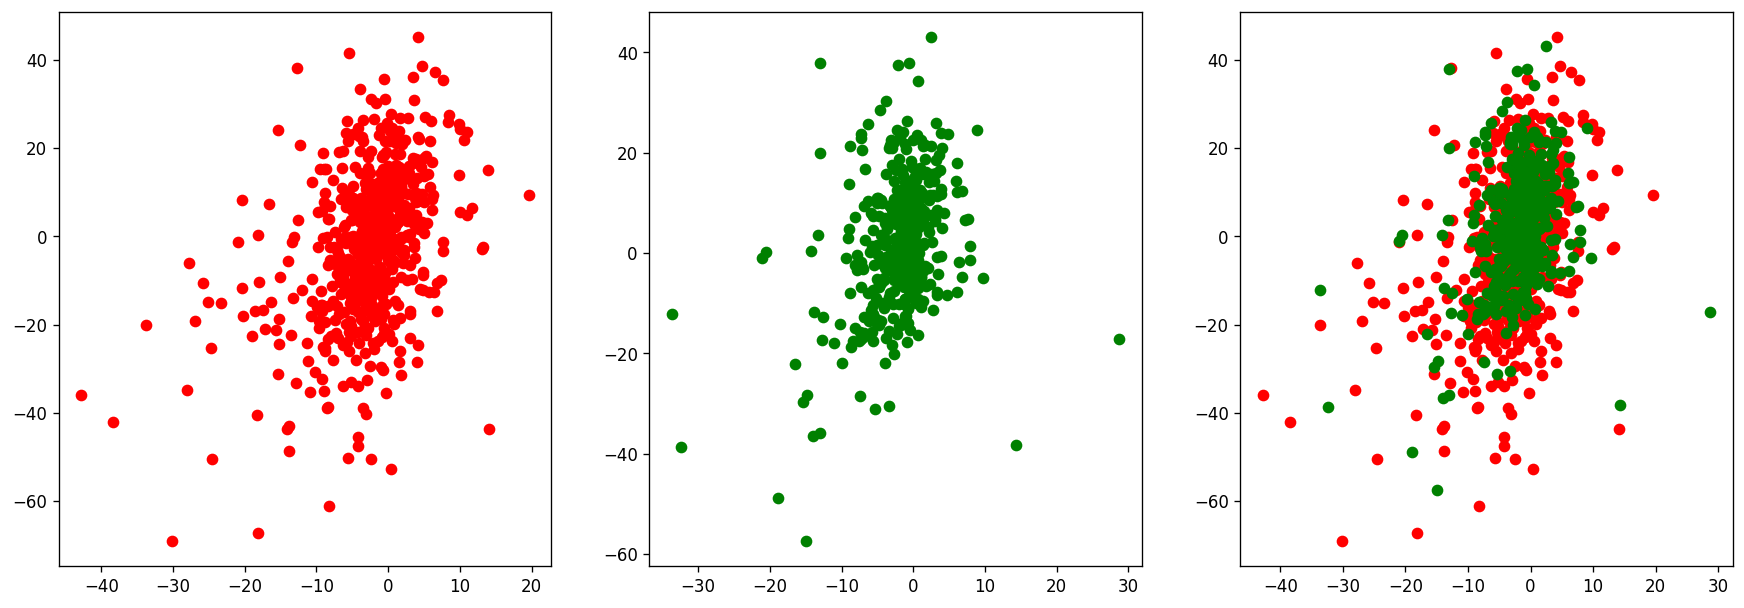

In [50]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['distance_1'], trap_signals['distance_2'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['distance_1'], real_signals['distance_2'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['distance_1'], trap_signals['distance_2'], c='red')
plt.scatter(real_signals['distance_1'], real_signals['distance_2'], c='green')

## 10. Price move (v2) & ATR & trap relationship

In [51]:
df10 = data[["Open", "Close", "High", "Low", "signal", "ATR", "trap"]].copy()
df10['price_move'] = df10['Close'] - df10['Close'].shift(2)
df10['price_move'] = round(df10['price_move'])
#
signal_data = df10[df10.signal != '']
signal_data.dropna(inplace=True)
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

<Axes: xlabel='price_move'>

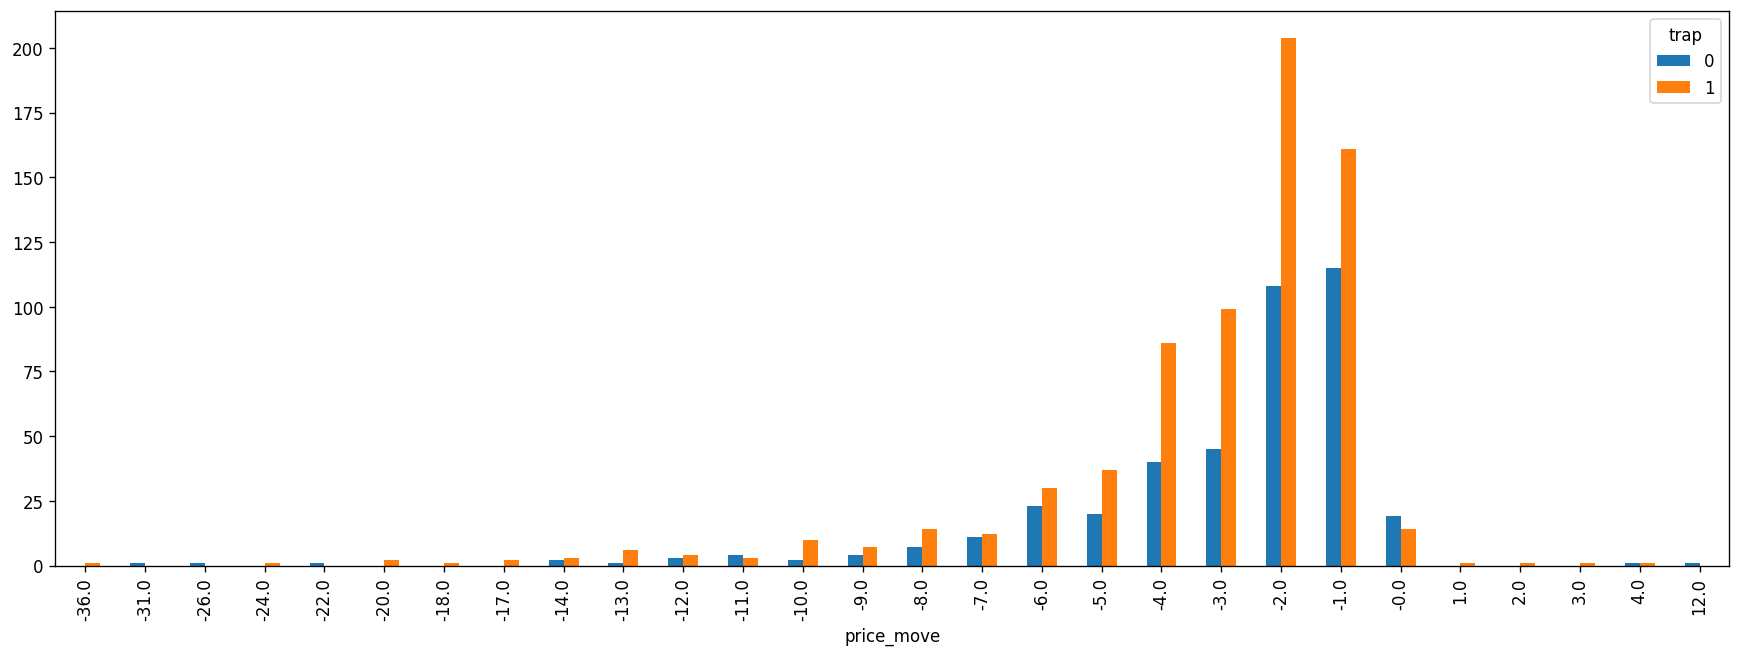

In [52]:
signal_group_by_price_move = signal_data.groupby(['price_move', 'trap'])['price_move'].count().rename({'price_move': 'count'})
signal_group_by_price_move.unstack().plot.bar()

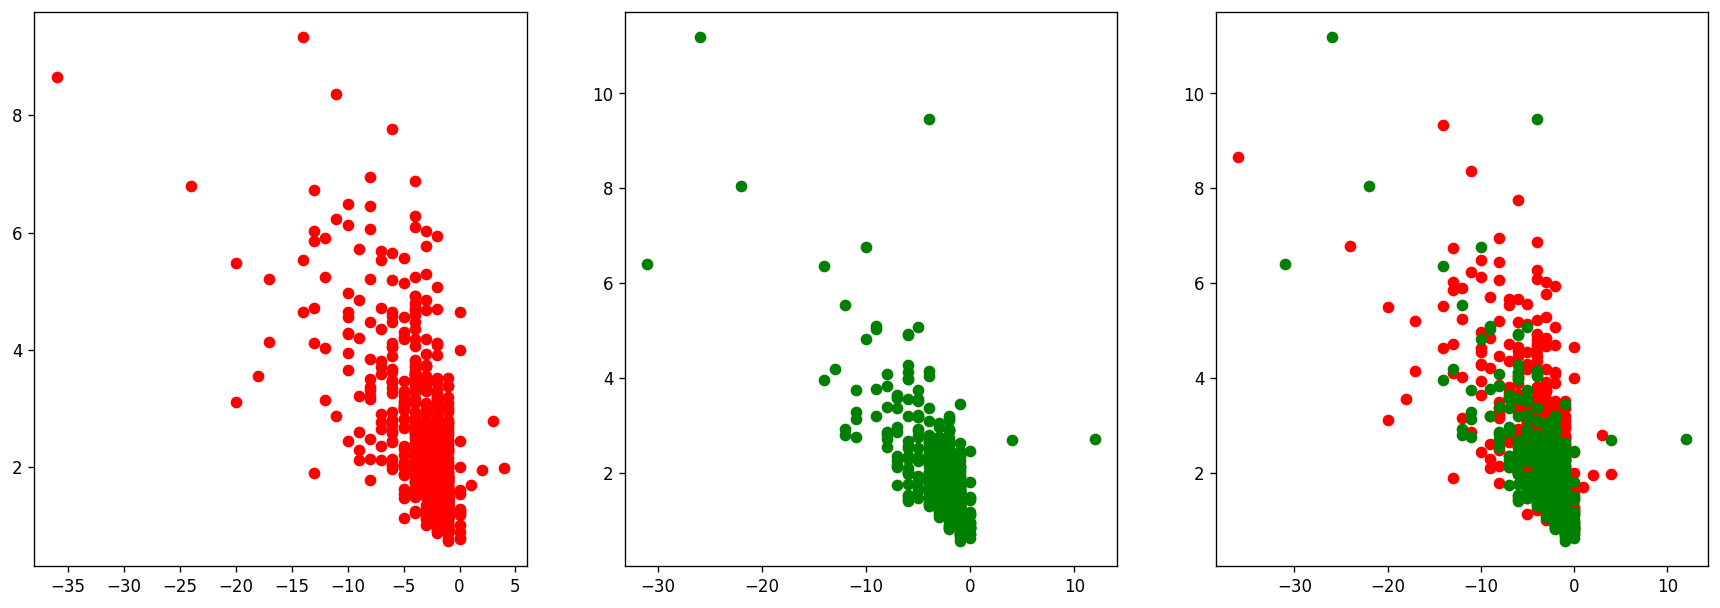

In [53]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['price_move'], trap_signals['ATR'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['price_move'], real_signals['ATR'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['price_move'], trap_signals['ATR'], c='red')
plt.scatter(real_signals['price_move'], real_signals['ATR'], c='green')

## 9. Distance from Close to EMA_26 & EMA_250

In [54]:
df9= data[["Open", "Close", "High", "Low", "signal", "trap"]].copy()
#
df9["ema_f"] = ta.ema(df9["Close"], length=26)
df9["ema_l"] = ta.ema(df9["Close"], length=250)
df9["distance_1"] = df9["Close"] - df9["ema_f"]
df9["distance_2"] = df9["Close"] - df9["ema_l"]
#
signal_data = df9[df9.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

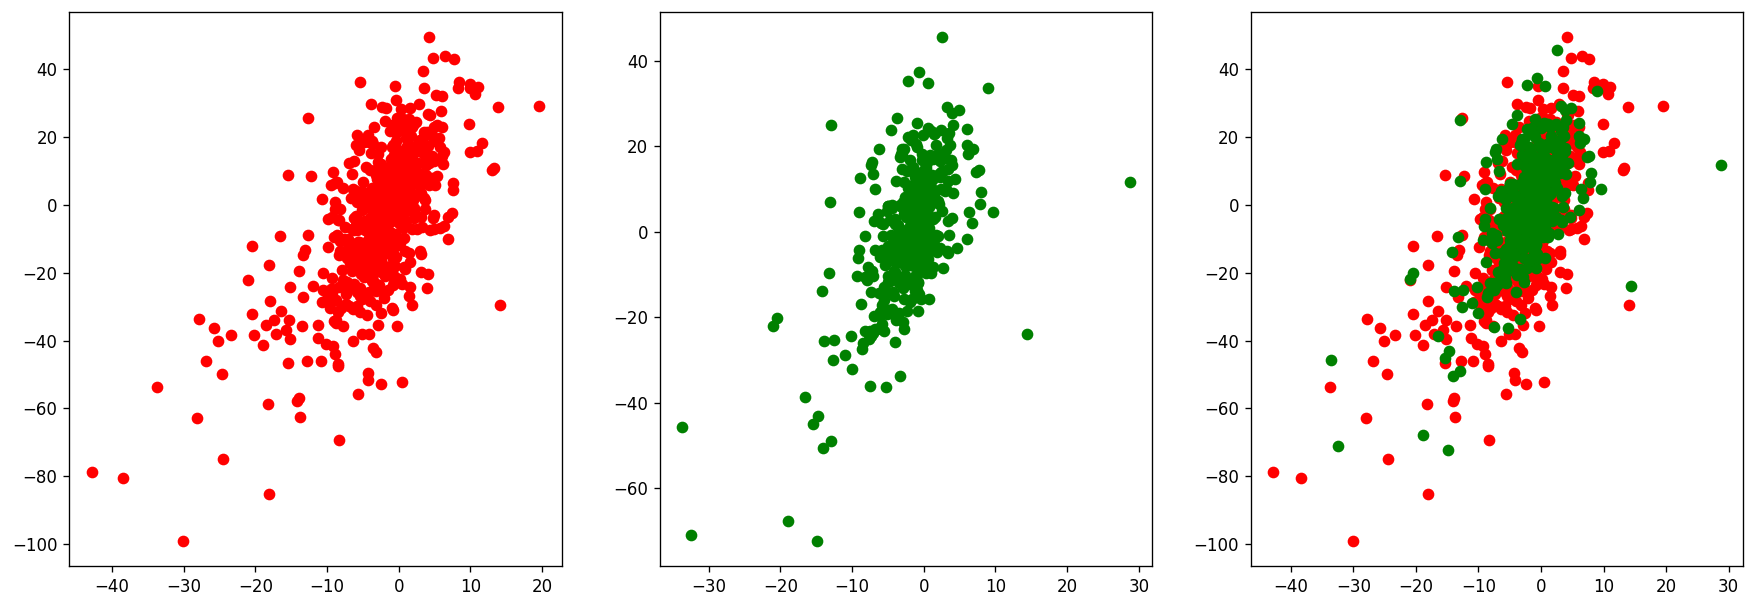

In [55]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['distance_1'], trap_signals['distance_2'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['distance_1'], real_signals['distance_2'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['distance_1'], trap_signals['distance_2'], c='red')
plt.scatter(real_signals['distance_1'], real_signals['distance_2'], c='green')

## 8. EMAs slope

In [56]:
df8 = data[["Open", "Close", "High", "Low", "signal", "trap"]].copy()
#
df8["ema"] = ta.ema(df8["Close"], length=20)
df8["ema_slope1"] = df8["ema"] - df8["ema"].shift(26)
df8["ema_slope1"] = round(df8["ema_slope1"])
df8["ema_slope2"] = df8["ema"] - df8["ema"].shift(51)
df8["ema_slope2"] = round(df8["ema_slope2"])
#
signal_data = df8[df8.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

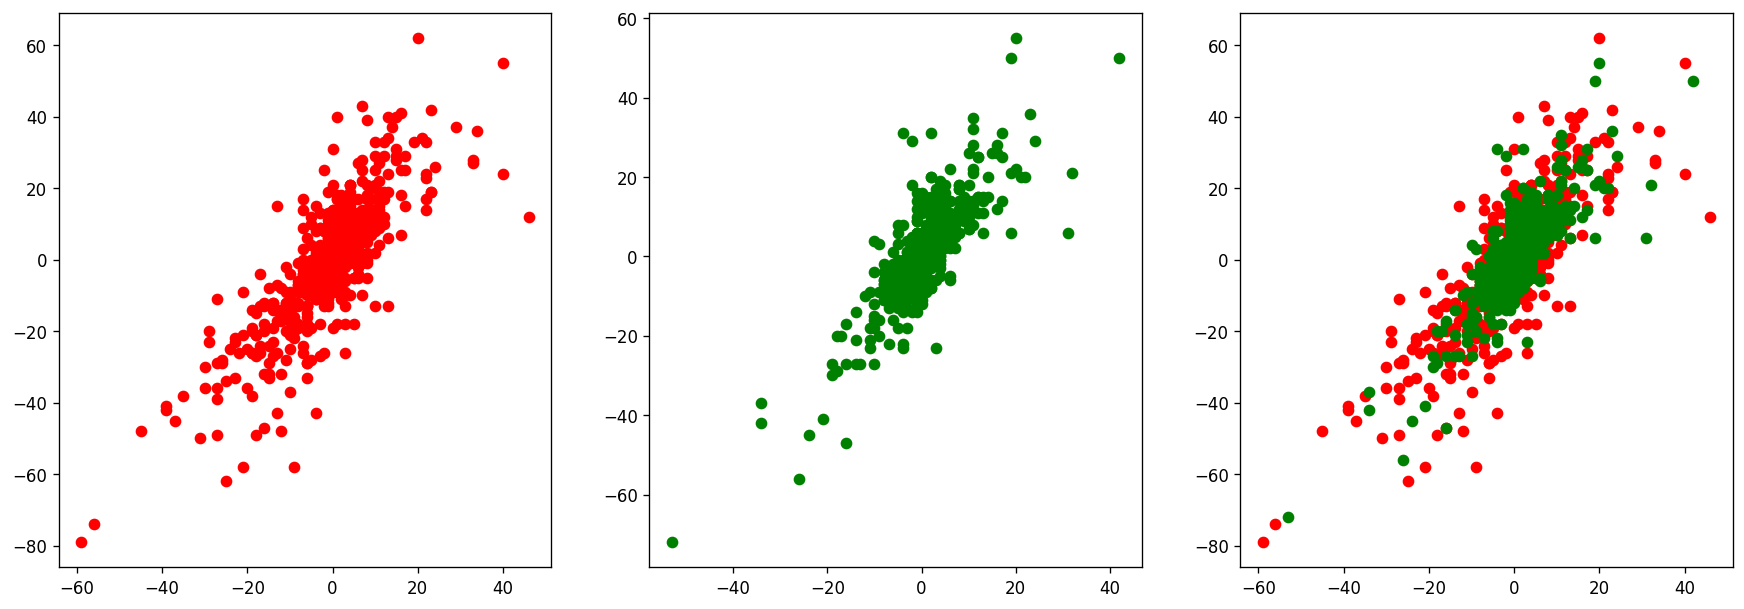

In [57]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['ema_slope1'], trap_signals['ema_slope2'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['ema_slope1'], real_signals['ema_slope2'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['ema_slope1'], trap_signals['ema_slope2'], c='red')
plt.scatter(real_signals['ema_slope1'], real_signals['ema_slope2'], c='green')

<Axes: xlabel='ema_slope1'>

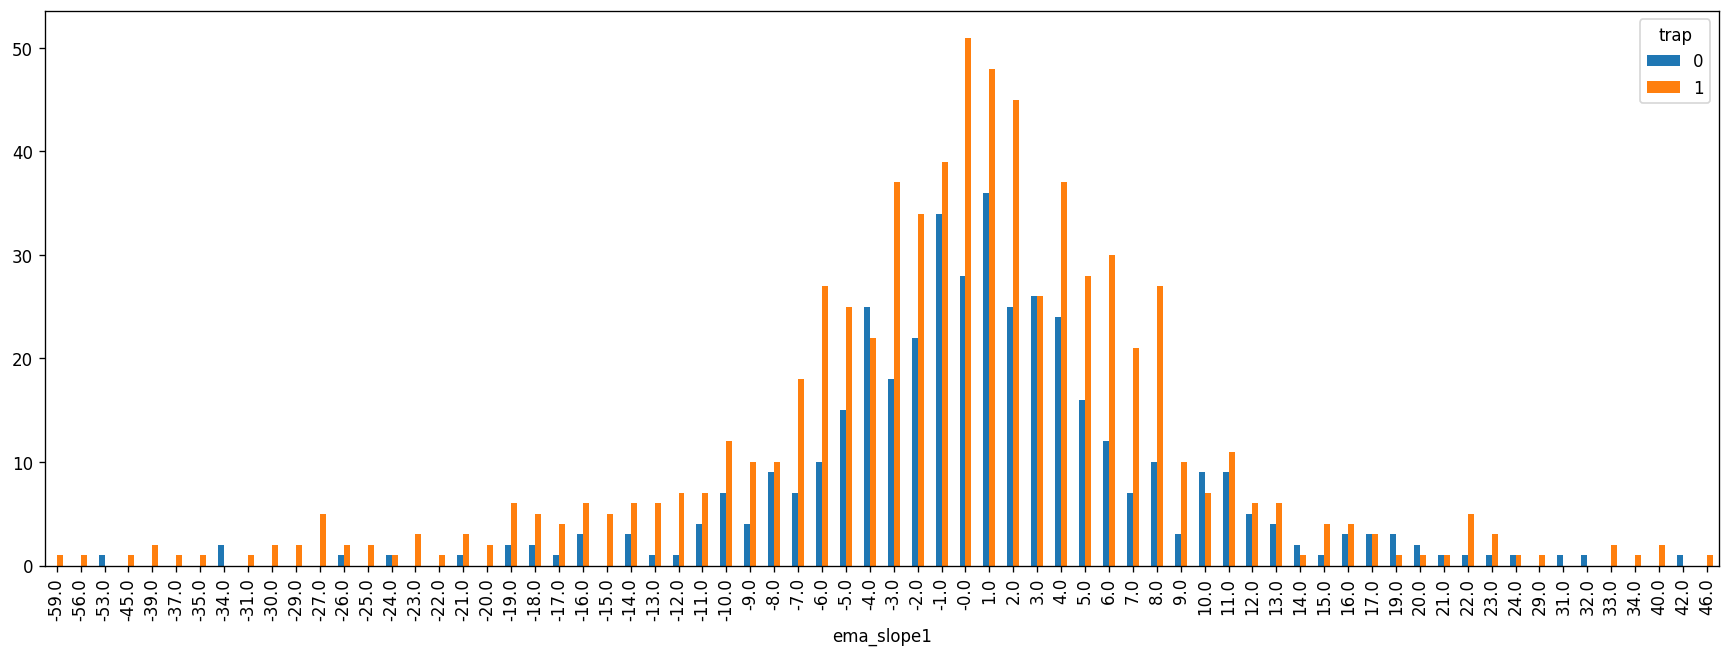

In [58]:
signal_group_by_ema_slope = signal_data.groupby(['ema_slope1', 'trap'])['ema_slope1'].count().rename({'ema_slope1': 'count'})
signal_group_by_ema_slope.unstack().plot.bar()

## 7. Time & couple_bars strength & trap relationship

In [59]:
df7 = data[["Open", "Close", "High", "Low", "signal", "trap"]].copy()
# couple bars strength = ((high - open) + (high - close)) / (2 * (high - low))
df7['couple_bars_strength'] = (2 * df7['Close'] - df7['Open'].shift(1) - df7['Close'].shift(1)) / (2 * df7['Close'] - 2 * df7['Low'].shift(1))
signal_data = df7[df7.signal != '']
signal_data.dropna(inplace=True)
signal_data['time_hm'] = 100 * signal_data.index.hour + signal_data.index.minute
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

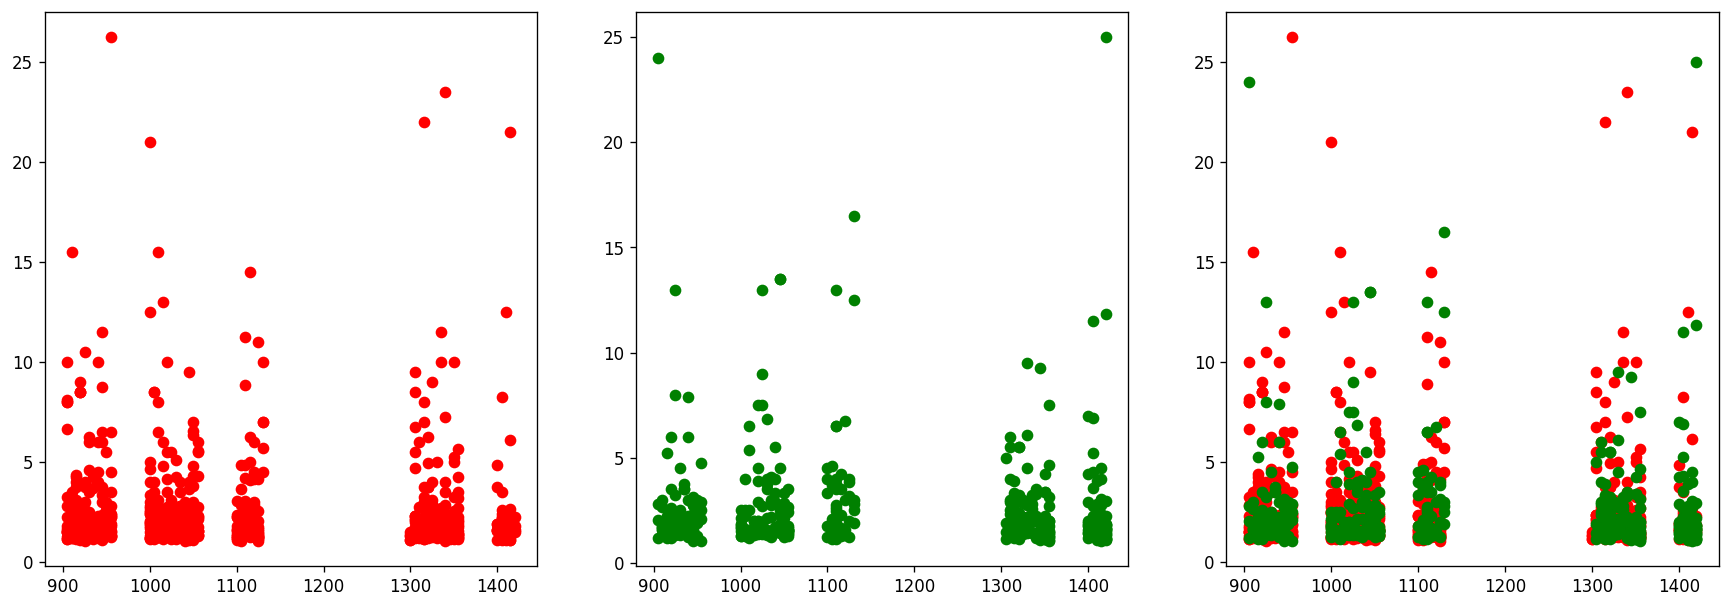

In [60]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['time_hm'], trap_signals['couple_bars_strength'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['time_hm'], real_signals['couple_bars_strength'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['time_hm'], trap_signals['couple_bars_strength'], c='red')
plt.scatter(real_signals['time_hm'], real_signals['couple_bars_strength'], c='green')

<Axes: xlabel='couple_bars_strength'>

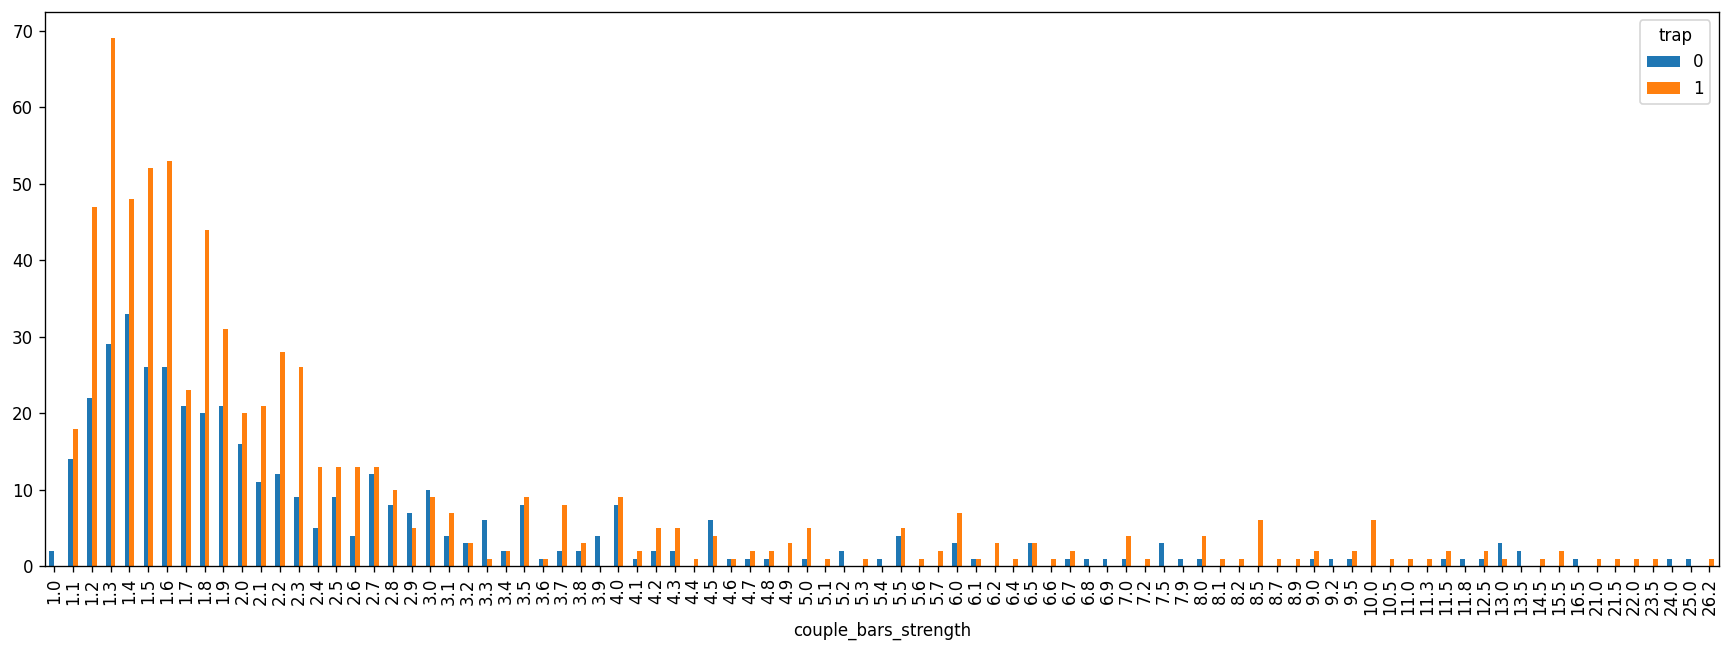

In [61]:
signal_data['couple_bars_strength'] = round(signal_data['couple_bars_strength'], 1)
signal_group_by_2bars_strength = signal_data.groupby(['couple_bars_strength', 'trap'])['couple_bars_strength'].count().rename({'couple_bars_strength': 'count'})
signal_group_by_2bars_strength.unstack().plot.bar()

## 6. Trend strength & MACD momentum & trap relationship

In [62]:
df6 = data[["Open", "Close", "High", "Low", "signal", "MACDh", "ADX42", "trap"]].copy()
signal_data = df6[df6.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

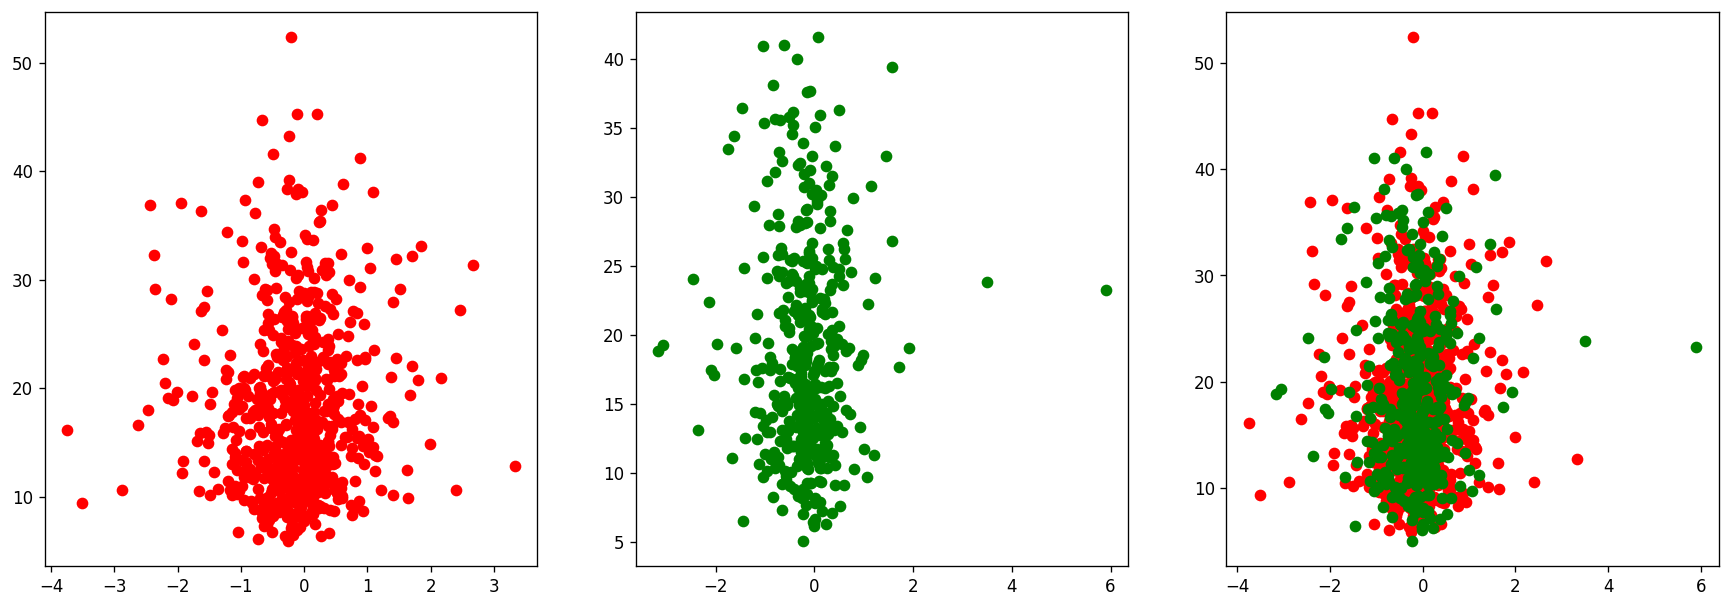

In [63]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['MACDh'], trap_signals['ADX42'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['MACDh'], real_signals['ADX42'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['MACDh'], trap_signals['ADX42'], c='red')
plt.scatter(real_signals['MACDh'], real_signals['ADX42'], c='green')

## 5. Trend strength ADX & trap relationship

In [64]:
df5 = data[["Open", "Close", "High", "Low", "signal", "ADX5", "ADX42", "trap"]].copy()
signal_data = df5[df5.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

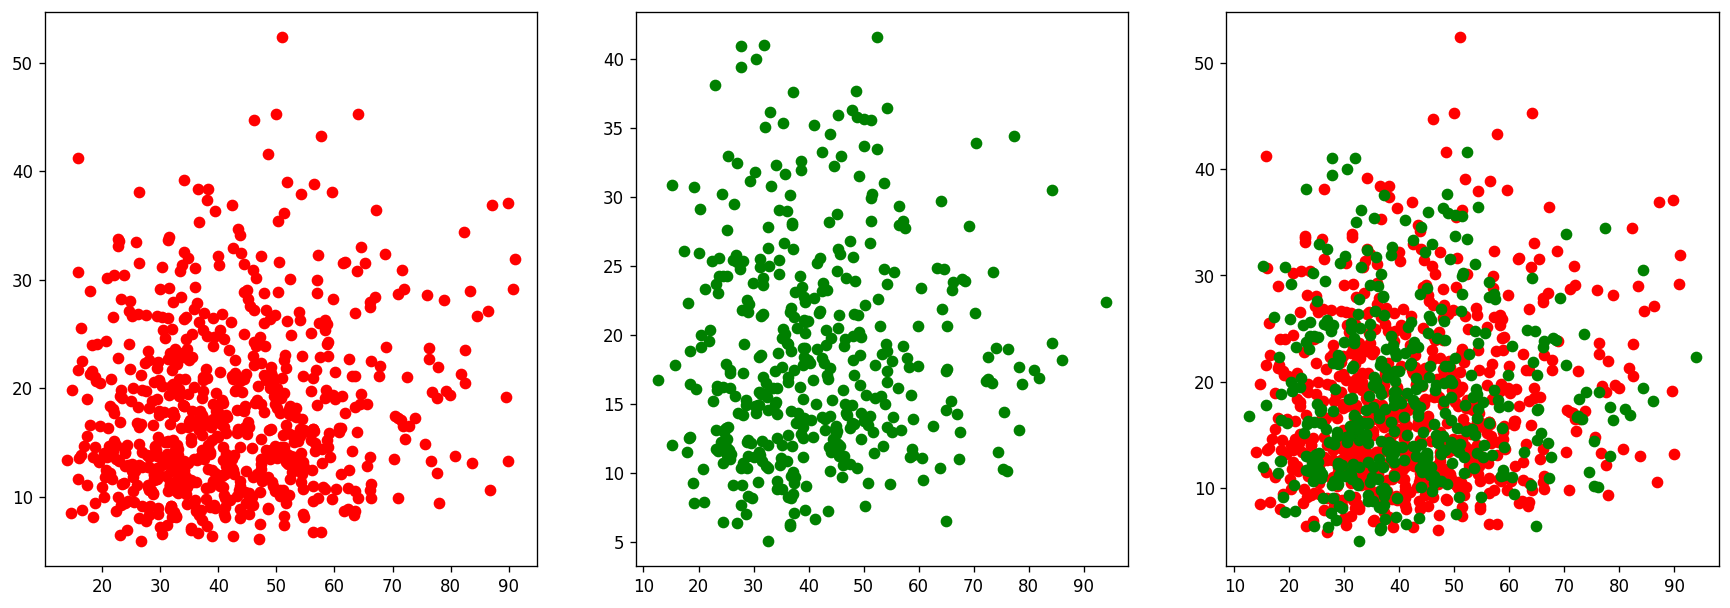

In [65]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['ADX5'], trap_signals['ADX42'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['ADX5'], real_signals['ADX42'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['ADX5'], trap_signals['ADX42'], c='red')
plt.scatter(real_signals['ADX5'], real_signals['ADX42'], c='green')

## 4. Price move & ATR & trap relationship

In [66]:
df4 = data[["Open", "Close", "High", "Low", "signal", "ATR", "trap"]].copy()
df4['price_move'] = df4['Close'] - df4['Close'].shift(1)
signal_data = df4[df4.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

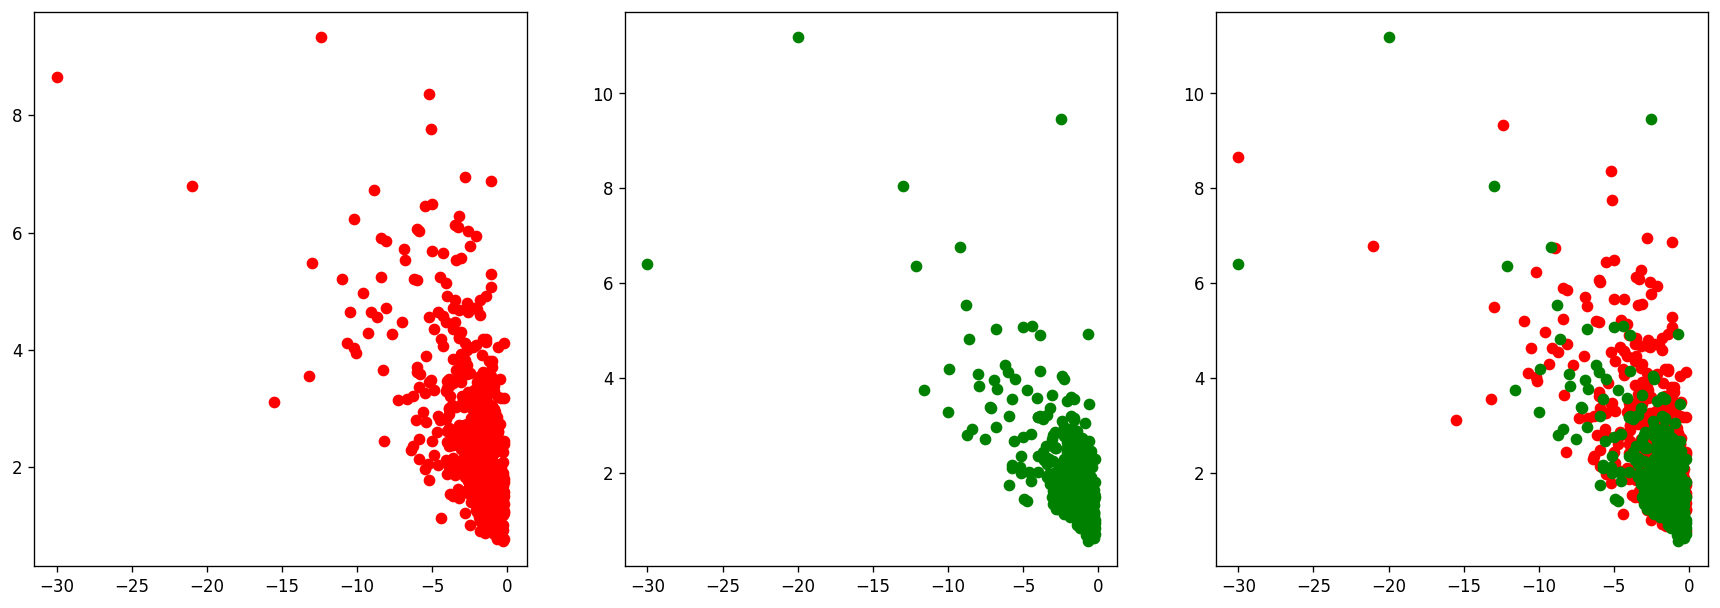

In [67]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['price_move'], trap_signals['ATR'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['price_move'], real_signals['ATR'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['price_move'], trap_signals['ATR'], c='red')
plt.scatter(real_signals['price_move'], real_signals['ATR'], c='green')

## 3. Min-Max last 20 & current price & trap relationship

In [68]:
df1 = data[["Open", "Close", "High", "Low", "signal", "RSI", "trap"]].copy()
df1['max_close20'] = df1['Close'].rolling(20).max()
df1['min_close20'] = df1['Close'].rolling(20).min()
df1['diff_to_max'] = df1['Close'] / df1['max_close20']
df1['diff_to_max'] = round(df1['diff_to_max'], 3)
df1['diff_to_min'] = df1['Close'] / df1['min_close20']
df1['diff_to_min'] = round(df1['diff_to_min'], 3)
signal_data = df1[df1.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

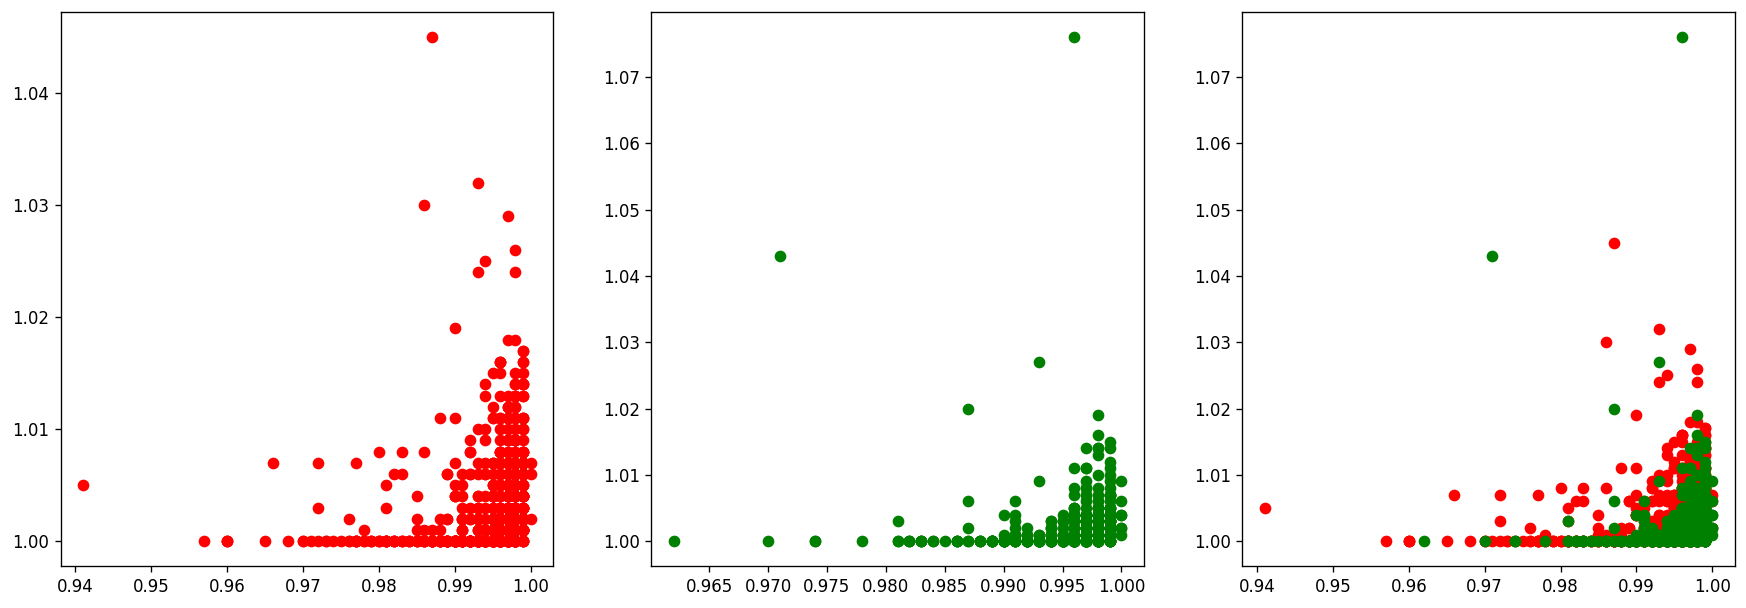

In [69]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['diff_to_max'], trap_signals['diff_to_min'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['diff_to_max'], real_signals['diff_to_min'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['diff_to_max'], trap_signals['diff_to_min'], c='red')
plt.scatter(real_signals['diff_to_max'], real_signals['diff_to_min'], c='green')

## 2. Divergence RSI & trap relationship visualize

In [70]:
df2 = data[["Open", "Close", "High", "Low", "signal", "RSI", "trap"]].copy()
# Identify Lower Low (LL) and Higher RSI
df2['LL'] = df2['Low'] < df2['Low'].shift(1).rolling(20).min() - 0.1
df2['Higher_RSI'] = df2['RSI'] > df2['RSI'].shift(1).rolling(20).min()
# Find divergence signals
df2['bullish_signal'] = df2.apply(lambda r: 1 if r['LL'] & r['Higher_RSI'] else 0, axis=1)
# Identify Higher High (HH) and Lower RSI
df2['HH'] = df2['High'] > df2['High'].shift(1).rolling(20).max() + 0.1
df2['Lower_RSI'] = df2['RSI'] < df2['RSI'].shift(1).rolling(20).max()
# Find divergence signals
df2['bearish_signal'] = df2.apply(lambda r: 1 if r['HH'] & r['Lower_RSI'] else 0, axis=1)
# Bullish Fair Value Gap: Previous High < Next Low (Upward imbalance)
df2["Bullish_FVG"] = df2["High"].shift(2) < df2["Low"]
df2['Bullish_FVG'] = df2.apply(lambda r: 1 if r['Bullish_FVG'] else 0, axis=1)
# Bearish Fair Value Gap: Previous Low > Next High (Downward imbalance)
df2["Bearish_FVG"] = df2["Low"].shift(2) > df2["High"]
df2['Bullish_FVG'] = df2.apply(lambda r: 1 if r['Bearish_FVG'] else 0, axis=1)
df2.dropna(inplace=True)
df2['pass_bearish_signal'] = df2['bearish_signal'].rolling(10).sum()
df2['pass_bullish_signal'] = df2['bullish_signal'].rolling(10).sum()
df2['pass_bearish_fvg'] = df2['Bearish_FVG'].rolling(10).sum()
df2['pass_bullish_fvg'] = df2['Bullish_FVG'].rolling(10).sum()
signal_data = df2[df2.signal != '']
signal_data.dropna(inplace=True)

<Axes: xlabel='RSI'>

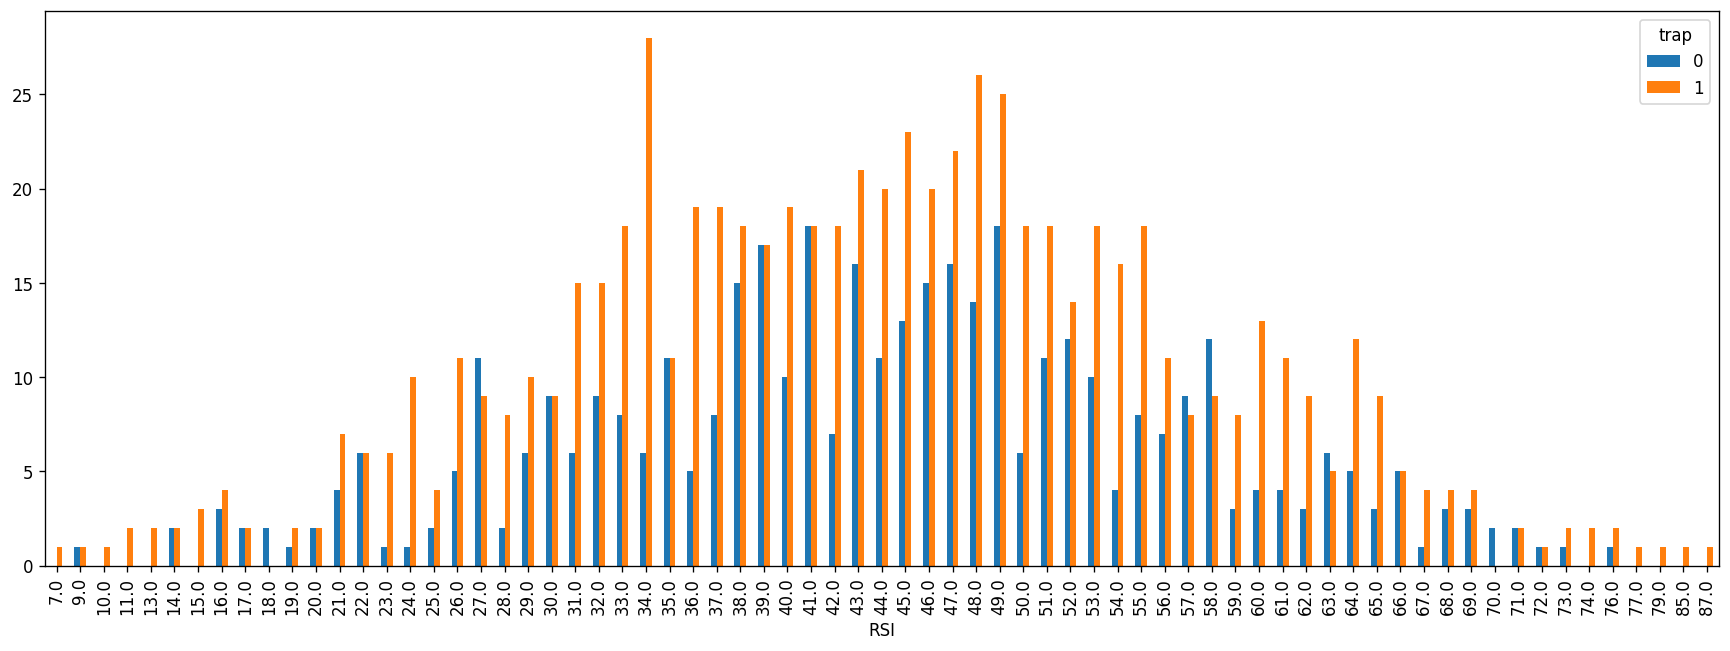

In [71]:
group_by_rsi = signal_data.groupby(['RSI', 'trap'])['RSI'].count().rename({'RSI': 'count'})
group_by_rsi.unstack().plot.bar()

## 1. Time & Trap relationship visualize

In [72]:
df3 = data[["Open", "Close", "High", "Low", "signal", "RSI", "trap"]].copy()
signal_data = df3[df3.signal != '']
signal_data['hour'] = signal_data.index.hour
signal_data['minute'] = signal_data.index.minute
signal_data['day'] = signal_data.index.day
signal_data['month'] = signal_data.index.month
signal_data['year'] = signal_data.index.year
signal_data['dow'] = signal_data.index.day_of_week
signal_data['time_hm'] = 100 * signal_data.index.hour + signal_data.index.minute
#
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

<Axes: xlabel='time_hm'>

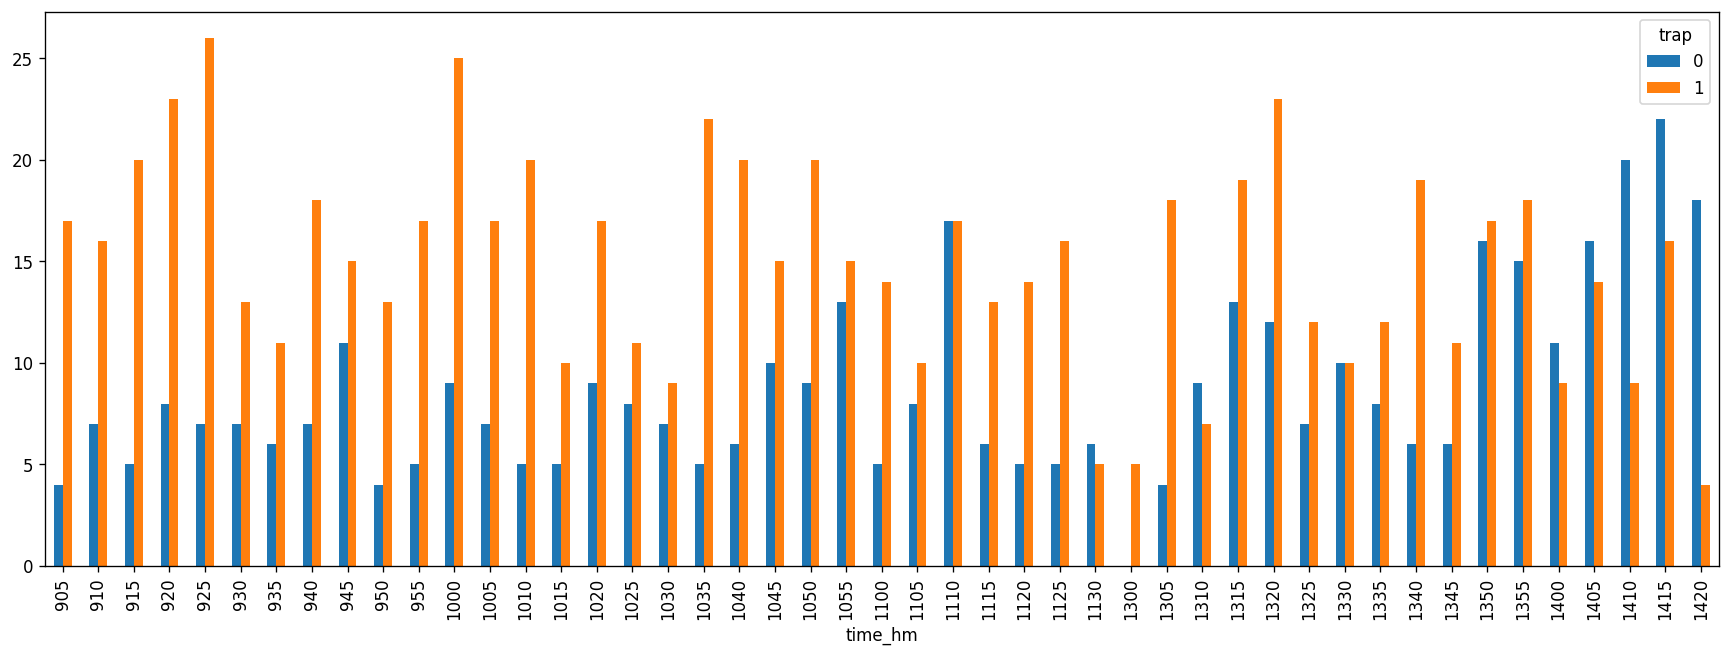

In [73]:
group_by_time_hm = signal_data.groupby(['time_hm', 'trap'])['time_hm'].count().rename({'time_hm': 'count'})
group_by_time_hm.unstack().plot.bar()

<Axes: xlabel='hour'>

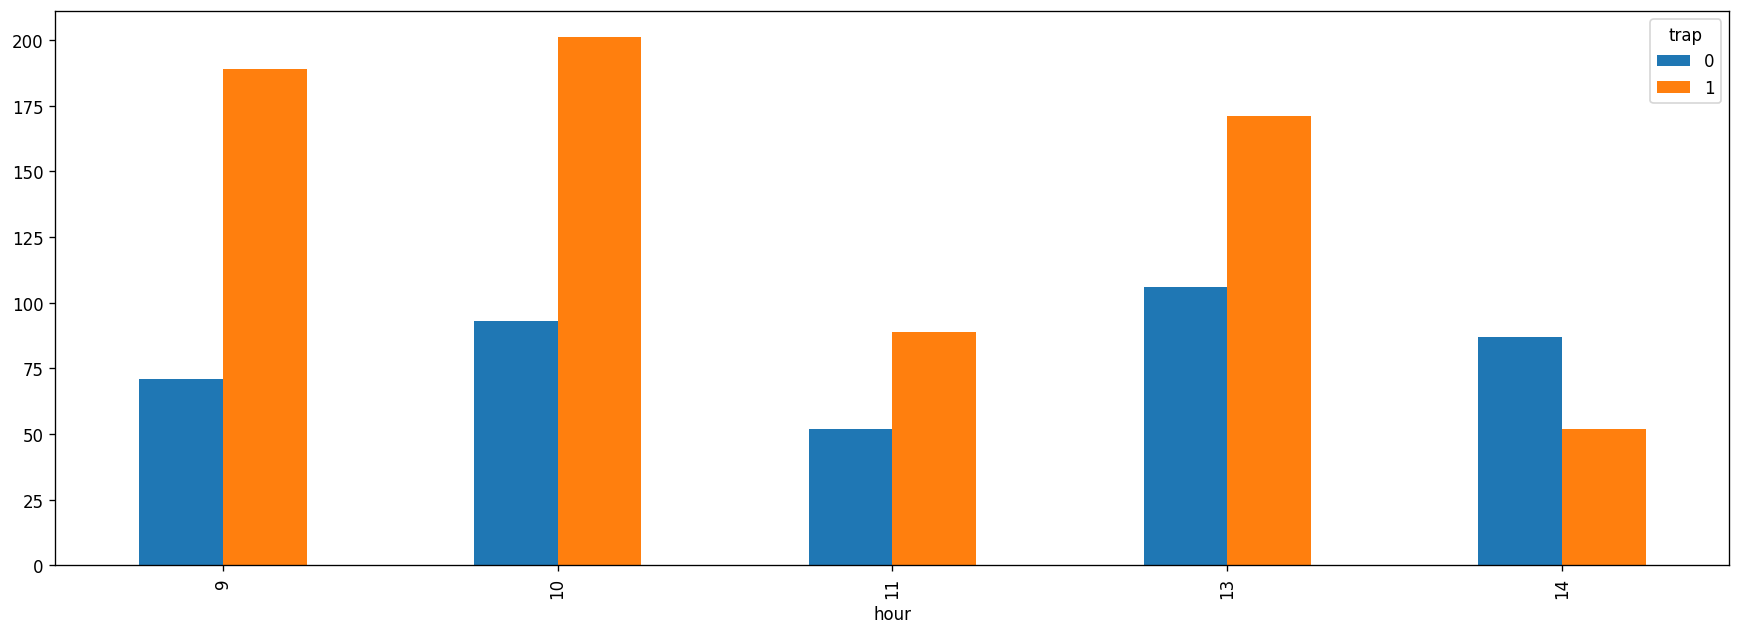

In [74]:
group_by_hour = signal_data.groupby(['hour', 'trap'])['hour'].count().rename({'hour': 'count'})
group_by_hour.unstack().plot.bar()

<Axes: xlabel='minute'>

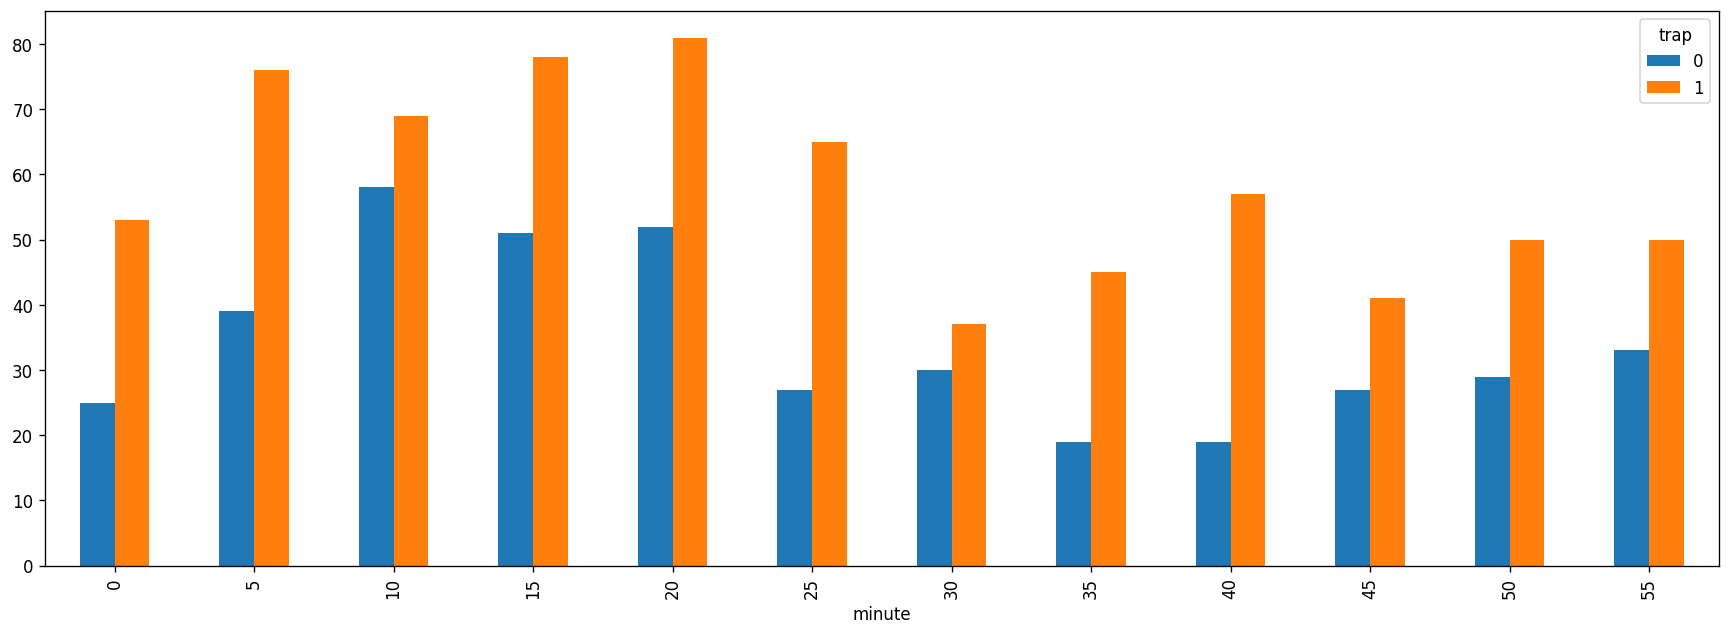

In [75]:
group_by_minute = signal_data.groupby(['minute', 'trap'])['minute'].count().rename({'minute': 'count'})
group_by_minute.unstack().plot.bar()

<Axes: xlabel='day'>

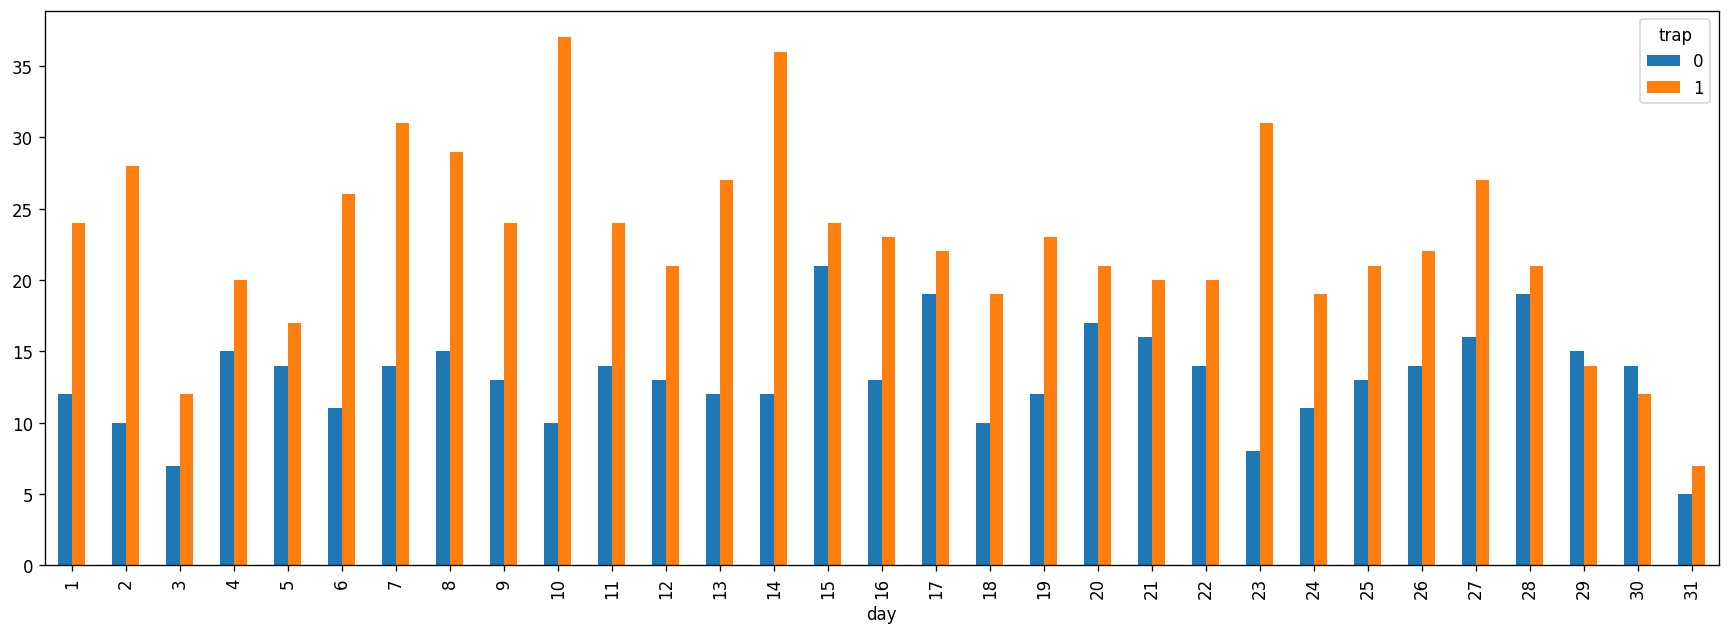

In [76]:
group_by_day = signal_data.groupby(['day', 'trap'])['day'].count().rename({'day': 'count'})
group_by_day.unstack().plot.bar()

<Axes: xlabel='month'>

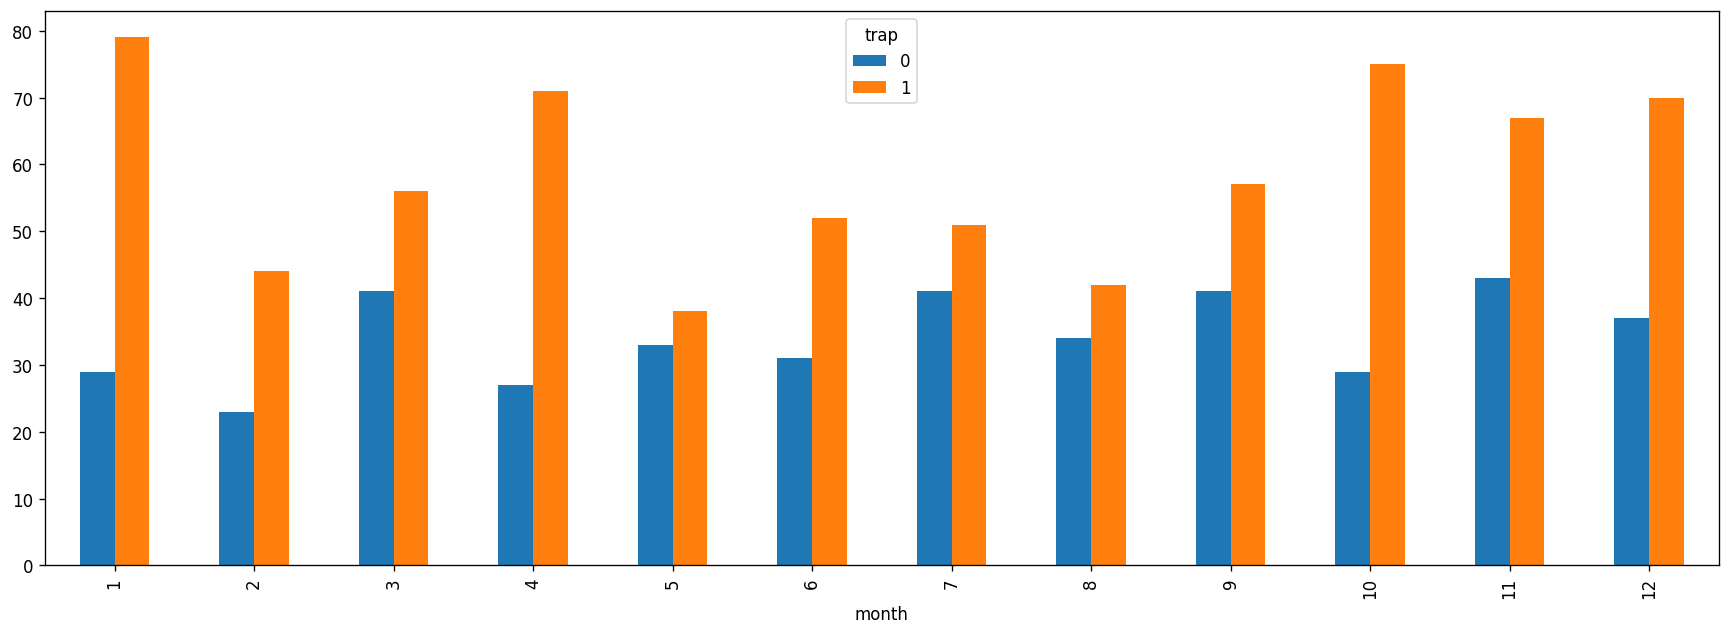

In [77]:
group_by_month = signal_data.groupby(['month', 'trap'])['month'].count().rename({'month': 'count'})
group_by_month.unstack().plot.bar()

<Axes: xlabel='year'>

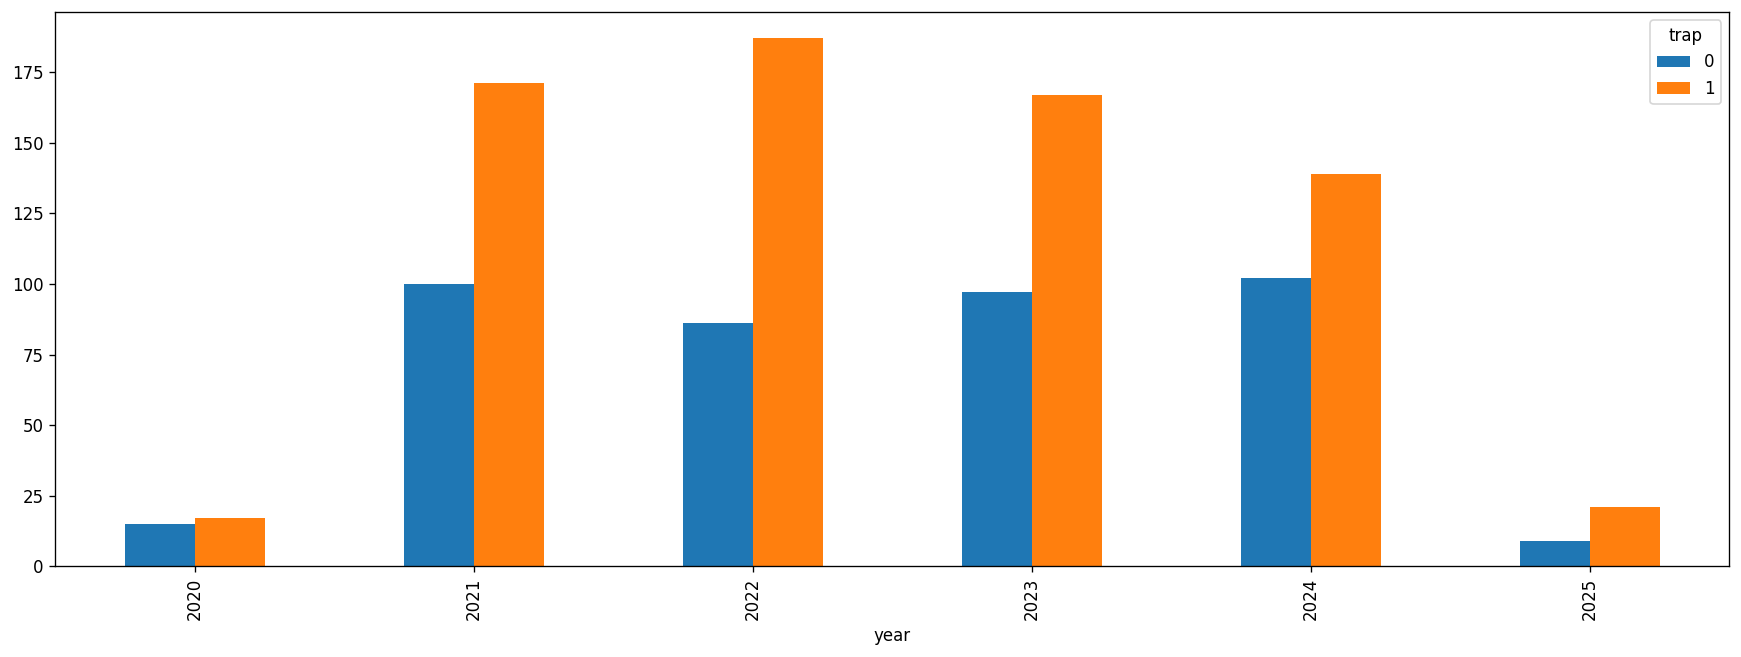

In [78]:
group_by_year = signal_data.groupby(['year', 'trap'])['year'].count().rename({'year': 'count'})
group_by_year.unstack().plot.bar()

<Axes: xlabel='dow'>

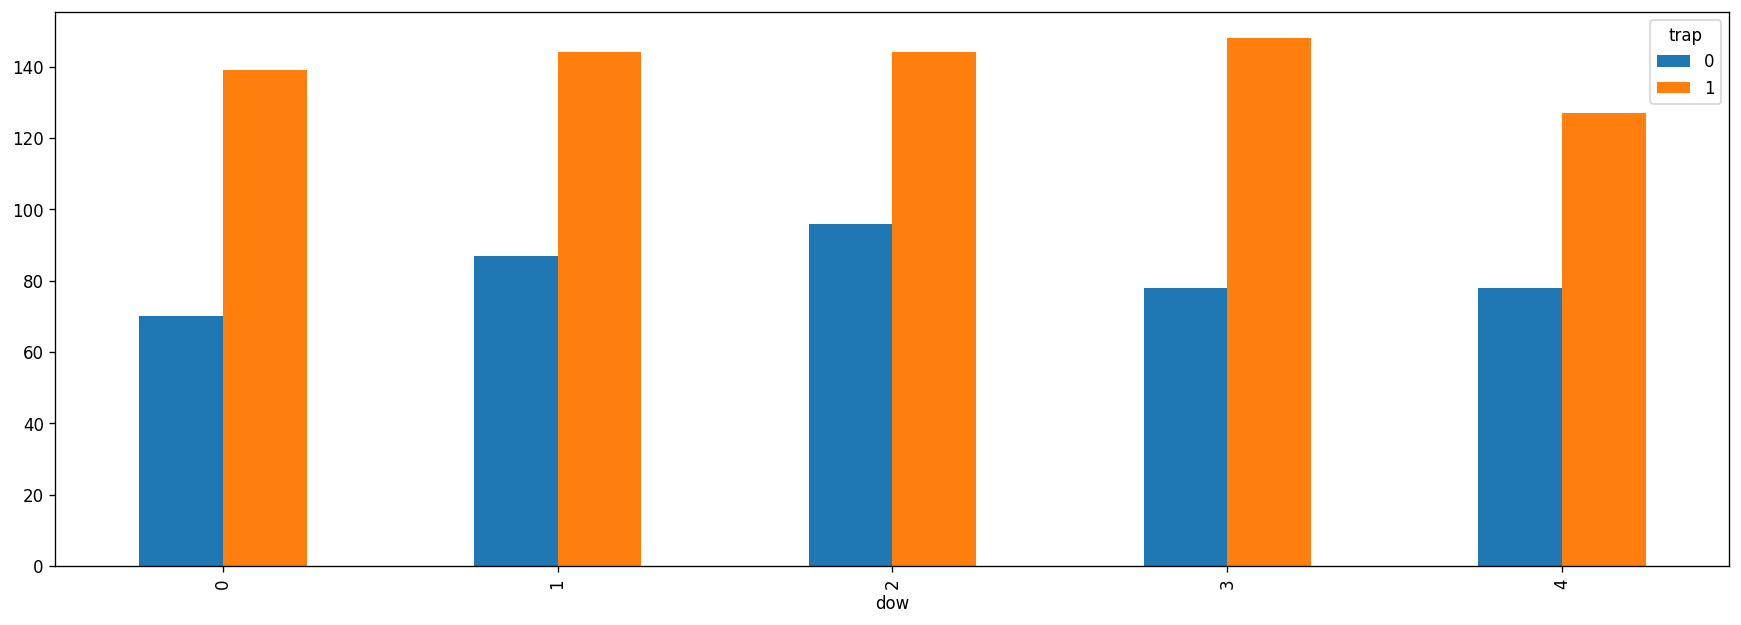

In [79]:
group_by_dow = signal_data.groupby(['dow', 'trap'])['dow'].count().rename({'dow': 'count'})
group_by_dow.unstack().plot.bar()